#1. Import de Bibliotecas:

In [507]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import collections

In [508]:
def plot_degree_distribution(G, graph_name="Graph"):

    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # Lista de graus
    degree_counts = collections.Counter(degree_sequence)
    degrees, counts = zip(*degree_counts.items())

    # Normaliza para obter a probabilidade P(k)
    total_nodes = G.number_of_nodes()
    probabilities = [count / total_nodes for count in counts]

    plt.figure(figsize=(10, 6))

    # Plot em escala linear-linear
    plt.figure(figsize=(10, 6))
    plt.bar(degrees, probabilities, width=0.80, color='b')
    plt.title(f"Distribuição de Graus - {graph_name} (Linear)")
    plt.xlabel("Grau (k)")
    plt.ylabel("Probabilidade P(k)")
    plt.grid(True, axis='y', ls="--", alpha=0.7)
    plt.show()

#2. Desenvolvimento do Trabalho:


##2.1. Análise geral

###Estudo:

In [ ]:
#Densidade: A densidade de um grafo indica o quão "cheio" de arestas ele é. Ela compara o número de arestas existentes no grafo com o número máximo de arestas que ele poderia ter.

In [509]:
#Medidas de centralidade:

#Centralidade de Grau: Número de conexões diretas que um nó possui.
#Nó com valor alto: É um nó "popular" ou um "conector" local, com muitas ligações imediatas. Pense numa pessoa que conhece muita gente numa festa.

#Centralidade de Proximidade: A eficiência com que um nó pode se espalhar ou acessar informações para todos os outros nós da rede.
#Nó com valor alto: Está numa posição privilegiada para disseminar informações rapidamente por toda a rede, pois está, em média, "perto" de todos.

#Centralidade de Intermediação: O controle que um nó exerce sobre o fluxo de informação (ou qualquer outra coisa que passe pela rede) entre diferentes partes da rede.
#Nó com valor alto: É um intermediário crucial. Se esse nó for removido, pode interromper muitas das comunicações entre outros nós. Atua como um "gargalo" ou um ponto de conexão vital.

#Centralidade de Autovetor: A influência de um nó na rede, considerando que conexões com nós mais importantes (com alta centralidade de autovetor) valem mais do que conexões com nós menos importantes.
#Nó com valor alto: É um nó influente porque está conectado a outros nós influentes. Não basta ter muitos amigos (grau), é preciso ter amigos "importantes".

#PageRank: A importância de um nó baseada tanto na quantidade quanto na "qualidade" dos nós que apontam para ele (especialmente em redes direcionadas).
#Nó com valor alto: É considerado um nó importante porque muitos outros nós (e/ou nós importantes) se conectam/apontam para ele. Originalmente usado para classificar páginas da web.

In [510]:
#Medidas de caminho e distância:

#Diâmetro: A maior distância (caminho mais curto) entre qualquer par de nós na rede. É o "quão longe" você pode ter que ir para conectar dois nós quaisquer.
#Rede com valor alto: A rede é "espalhada", e algumas partes podem demorar para se comunicar com outras.
#Rede com valor baixo: A rede é mais "compacta" ou "apertada", e a comunicação entre quaisquer dois pontos é relativamente rápida.

#Raio: A menor excentricidade de todos os nós da rede. (A excentricidade de um nó é a sua maior distância para qualquer outro nó). O raio é a excentricidade do(s) nó(s) mais central(is).
#Rede com valor baixo: Existe pelo menos um nó que consegue alcançar todos os outros de forma relativamente rápida. Indica o quão "próximo" o centro da rede está de suas extremidades.

#Caminho Médio: A média de todos os caminhos mais curtos entre todos os pares possíveis de nós na rede.
#Rede com valor baixo: Em média, a navegação ou o fluxo de informação é eficiente. É uma característica chave das redes de "mundo pequeno" (small-world networks), onde "poucos graus de separação" conectam as pessoas.
#Rede com valor alto: Em média, leva-se mais tempo ou mais passos para ir de um nó a outro.

In [511]:
#Medidas de conectividade:

#Conectividade de Vértices: O número mínimo de nós que, se removidos, desconectariam a rede ou a transformariam num único ponto isolado.

#Conectividade de Arestas: O número mínimo de arestas que, se removidas, aumentariam o número de componentes conectados da rede (ou seja, a dividiriam).

#Número de Componentes Conectados: Quantas "ilhas" de nós existem na rede.

In [512]:
#Coeficiente de agrupamento:

#Local:
#Valor alto (próximo de 1) para um nó: Os vizinhos desse nó formam uma "panelinha" bem conectada. Se o nó A tem amigos B, C e D, e B, C, D também são todos amigos entre si, o coeficiente local de A é alto.
#Valor baixo (próximo de 0) para um nó: Os vizinhos desse nó não se conhecem muito bem entre si. Os amigos de A (B, C, D) não têm muitas conexões uns com os outros.

#Médio:
#Valor alto (próximo de 1): A rede como um todo tem uma forte tendência a formar grupos densos e coesos.
#Valor baixo (próximo de 0): A rede tem poucas "panelinhas". As conexões são mais dispersas e a formação de triângulos (três nós todos conectados entre si) é menos comum.

In [513]:
#Coeficiente de assortatividade:

#Assortatividade positiva (coeficiente > 0): Nós populares se conectam com outros nós populares.
#Assortatividade negativa (coeficiente < 0): Nós muito conectados (hubs) servem como pontos de conexão para muitos nós menos conectados.
#Não assortativo (coeficiente ≈ 0): Não há uma tendência clara. As conexões parecem aleatórias no que diz respeito ao grau dos nós.

###2.1.1. Barabasi-Albert (redes livres de escala)

(n = vértices, m = número de arestas para anexar de um novo nó a nós existentes no grafo, seed)

Impacto de m no Grafo Final:

- Densidade do Grafo:
  Um valor maior de m resultará em um grafo mais denso, com mais arestas no total.

- Grau Mínimo:
  Cada nó no grafo final terá um grau (número de conexões) de pelo menos m.

- Formação de Hubs:
  m é fundamental para o surgimento de hubs (nós com um número excepcionalmente alto de conexões).
  Quanto maior m, mais rapidamente esses hubs podem se formar, embora a distribuição de grau ainda siga uma lei de potência, que é a característica do modelo Barabási-Albert.

- Conectividade:
  m influencia diretamente a conectividade do grafo. Se m=1, cada novo nó adiciona apenas uma aresta,
  potencialmente levando a um grafo mais "esparso" e com menos caminhos curtos entre os nós, embora ainda conectado.
  Se m for maior, o grafo será mais robusto e densamente interligado.

In [514]:
# Parameters for Barabasi-Albert graph
n = 100
m = 5

####Grafos

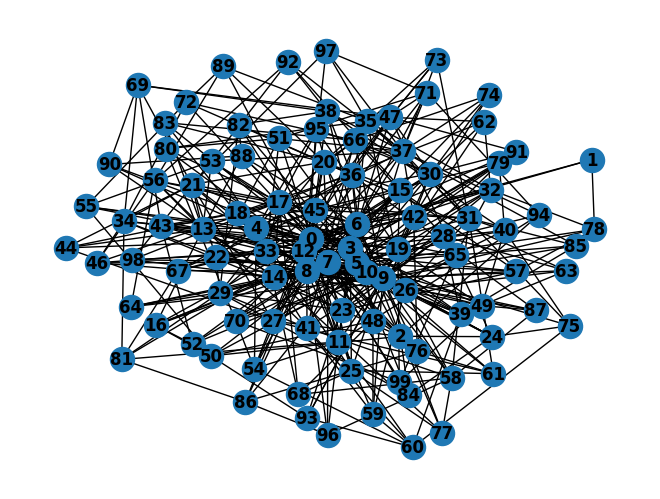

In [515]:
Grafo_B1 = nx.barabasi_albert_graph(n, m, seed = 24003315)
nx.draw(Grafo_B1, with_labels = True, font_weight = 'bold')
plt.show()

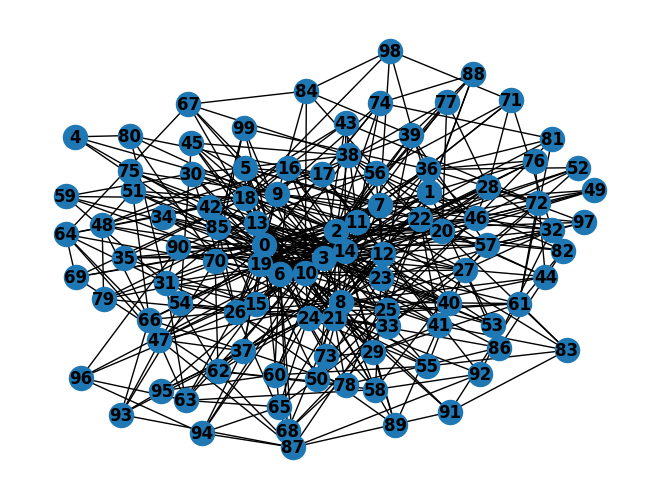

In [516]:
Grafo_B2 = nx.barabasi_albert_graph(n, m, seed = 24002125)
nx.draw(Grafo_B2, with_labels = True, font_weight = 'bold')
plt.show()

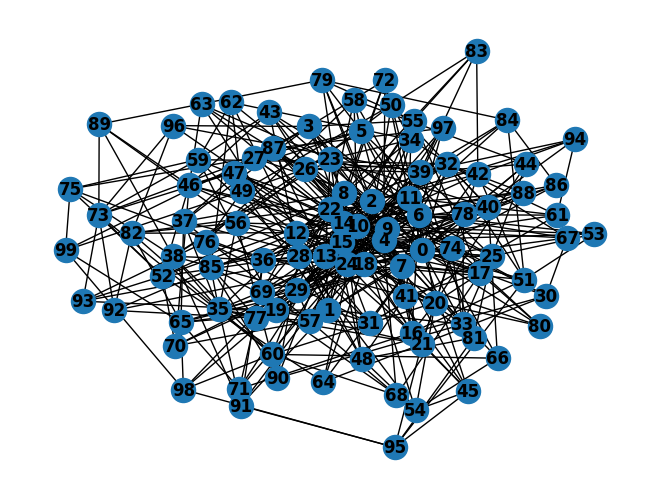

In [517]:
Grafo_B3 = nx.barabasi_albert_graph(n, m, seed = 23027619)
nx.draw(Grafo_B3, with_labels = True, font_weight = 'bold')
plt.show()

####Medidas de centralidade

In [518]:
degree_centrality = nx.degree_centrality(Grafo_B1)
closeness_centrality = nx.closeness_centrality(Grafo_B1)
betweenness_centrality = nx.betweenness_centrality(Grafo_B1)
eigenvector_centrality = nx.eigenvector_centrality(Grafo_B1)
pagerank = nx.pagerank(Grafo_B1)

def get_top_three(centrality_dict):
  """Sorts a centrality dictionary and returns the top three entries."""
  sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
  return sorted_centrality[:3]

top_three_degree = get_top_three(degree_centrality)
top_three_closeness = get_top_three(closeness_centrality)
top_three_betweenness = get_top_three(betweenness_centrality)
top_three_eigenvector = get_top_three(eigenvector_centrality)
top_three_pagerank = get_top_three(pagerank)

print("Top 3 Centralidade de Grau:", top_three_degree)
print("Top 3 Centralidade de Proximidade:", top_three_closeness)
print("Top 3 Centralidade de Intermediação:", top_three_betweenness)
print("Top 3 Centralidade de Autovetor:", top_three_eigenvector)
print("Top 3 PageRank:", top_three_pagerank)

Top 3 Centralidade de Grau: [(9, 0.38383838383838387), (0, 0.36363636363636365), (8, 0.27272727272727276)]
Top 3 Centralidade de Proximidade: [(9, 0.6149068322981367), (0, 0.6111111111111112), (8, 0.5755813953488372)]
Top 3 Centralidade de Intermediação: [(9, 0.14033566035625408), (0, 0.12756255347048392), (3, 0.06823472234799753)]
Top 3 Centralidade de Autovetor: [(0, 0.2966046065444751), (9, 0.29648926507720297), (6, 0.25631959524483766)]
Top 3 PageRank: [(9, 0.03604742180630184), (0, 0.0341730695708471), (8, 0.025375545770207758)]


In [519]:
degree_centrality = nx.degree_centrality(Grafo_B2)
closeness_centrality = nx.closeness_centrality(Grafo_B2)
betweenness_centrality = nx.betweenness_centrality(Grafo_B2)
eigenvector_centrality = nx.eigenvector_centrality(Grafo_B2)
pagerank = nx.pagerank(Grafo_B2)

def get_top_three(centrality_dict):
  """Sorts a centrality dictionary and returns the top three entries."""
  sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
  return sorted_centrality[:3]

top_three_degree = get_top_three(degree_centrality)
top_three_closeness = get_top_three(closeness_centrality)
top_three_betweenness = get_top_three(betweenness_centrality)
top_three_eigenvector = get_top_three(eigenvector_centrality)
top_three_pagerank = get_top_three(pagerank)

print("Top 3 Centralidade de Grau:", top_three_degree)
print("Top 3 Centralidade de Proximidade:", top_three_closeness)
print("Top 3 Centralidade de Intermediação:", top_three_betweenness)
print("Top 3 Centralidade de Autovetor:", top_three_eigenvector)
print("Top 3 PageRank:", top_three_pagerank)

Top 3 Centralidade de Grau: [(0, 0.38383838383838387), (3, 0.3434343434343435), (2, 0.31313131313131315)]
Top 3 Centralidade de Proximidade: [(0, 0.61875), (3, 0.592814371257485), (6, 0.5892857142857143)]
Top 3 Centralidade de Intermediação: [(0, 0.12375187720517031), (3, 0.12055081099075969), (2, 0.09588712910654032)]
Top 3 Centralidade de Autovetor: [(0, 0.3302117706512094), (3, 0.2517067555373758), (6, 0.24681504932996554)]
Top 3 PageRank: [(0, 0.03564663351928187), (3, 0.03281309380816889), (2, 0.029690341012566478)]


In [520]:
degree_centrality = nx.degree_centrality(Grafo_B3)
closeness_centrality = nx.closeness_centrality(Grafo_B3)
betweenness_centrality = nx.betweenness_centrality(Grafo_B3)
eigenvector_centrality = nx.eigenvector_centrality(Grafo_B3)
pagerank = nx.pagerank(Grafo_B3)

def get_top_three(centrality_dict):
  """Sorts a centrality dictionary and returns the top three entries."""
  sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
  return sorted_centrality[:3]

top_three_degree = get_top_three(degree_centrality)
top_three_closeness = get_top_three(closeness_centrality)
top_three_betweenness = get_top_three(betweenness_centrality)
top_three_eigenvector = get_top_three(eigenvector_centrality)
top_three_pagerank = get_top_three(pagerank)

print("Top 3 Centralidade de Grau:", top_three_degree)
print("Top 3 Centralidade de Proximidade:", top_three_closeness)
print("Top 3 Centralidade de Intermediação:", top_three_betweenness)
print("Top 3 Centralidade de Autovetor:", top_three_eigenvector)
print("Top 3 PageRank:", top_three_pagerank)

Top 3 Centralidade de Grau: [(0, 0.32323232323232326), (4, 0.2828282828282829), (6, 0.26262626262626265)]
Top 3 Centralidade de Proximidade: [(0, 0.5857988165680473), (4, 0.5689655172413793), (10, 0.5689655172413793)]
Top 3 Centralidade de Intermediação: [(0, 0.0914356913369531), (4, 0.08849361466968882), (10, 0.07819214954797211)]
Top 3 Centralidade de Autovetor: [(0, 0.30840444952620816), (6, 0.24697297714296979), (4, 0.2415347389777649)]
Top 3 PageRank: [(0, 0.029790257991031723), (4, 0.026779103647448694), (6, 0.024577171652178705)]


####Medidadas de caminho e distância

In [521]:
if nx.is_connected(Grafo_B1):
    diameter = nx.diameter(Grafo_B1)
    radius = nx.radius(Grafo_B1)
    avg_path_length = nx.average_shortest_path_length(Grafo_B1)
    print("Diâmetro:", diameter)
    print("Raio:", radius)
    print("Caminho Médio:", avg_path_length)
else:
    print("O grafo não é conexo. Analisando a maior componente conexa...")
    largest_cc = max(nx.connected_components(Grafo_B1), key=len)
    subgraph = Grafo_B1.subgraph(largest_cc)
    diameter = nx.diameter(subgraph)
    radius = nx.radius(subgraph)
    avg_path_length = nx.average_shortest_path_length(subgraph)
    print("Diâmetro da maior componente:", diameter)
    print("Raio da maior componente:", radius)
    print("Caminho Médio da maior componente:", avg_path_length)

# Exemplo de menor caminho entre dois nós
shortest_path = nx.shortest_path(Grafo_B1, 0, 99)
print("Menor caminho entre nó 0 e 99:", shortest_path)

Diâmetro: 4
Raio: 2
Caminho Médio: 2.2195959595959596
Menor caminho entre nó 0 e 99: [0, 7, 99]


In [522]:
if nx.is_connected(Grafo_B2):
    diameter = nx.diameter(Grafo_B2)
    radius = nx.radius(Grafo_B2)
    avg_path_length = nx.average_shortest_path_length(Grafo_B2)
    print("Diâmetro:", diameter)
    print("Raio:", radius)
    print("Caminho Médio:", avg_path_length)
else:
    print("O grafo não é conexo. Analisando a maior componente conexa...")
    largest_cc = max(nx.connected_components(Grafo_B2), key=len)
    subgraph = Grafo_B2.subgraph(largest_cc)
    diameter = nx.diameter(subgraph)
    radius = nx.radius(subgraph)
    avg_path_length = nx.average_shortest_path_length(subgraph)
    print("Diâmetro da maior componente:", diameter)
    print("Raio da maior componente:", radius)
    print("Caminho Médio da maior componente:", avg_path_length)

# Exemplo de menor caminho entre dois nós
shortest_path = nx.shortest_path(Grafo_B1, 0, 99)
print("Menor caminho entre nó 0 e 99:", shortest_path)

Diâmetro: 4
Raio: 2
Caminho Médio: 2.210909090909091
Menor caminho entre nó 0 e 99: [0, 7, 99]


In [523]:
if nx.is_connected(Grafo_B3):
    diameter = nx.diameter(Grafo_B3)
    radius = nx.radius(Grafo_B3)
    avg_path_length = nx.average_shortest_path_length(Grafo_B3)
    print("Diâmetro:", diameter)
    print("Raio:", radius)
    print("Caminho Médio:", avg_path_length)
else:
    print("O grafo não é conexo. Analisando a maior componente conexa...")
    largest_cc = max(nx.connected_components(Grafo_B3), key=len)
    subgraph = Grafo_B3.subgraph(largest_cc)
    diameter = nx.diameter(subgraph)
    radius = nx.radius(subgraph)
    avg_path_length = nx.average_shortest_path_length(subgraph)
    print("Diâmetro da maior componente:", diameter)
    print("Raio da maior componente:", radius)
    print("Caminho Médio da maior componente:", avg_path_length)

# Exemplo de menor caminho entre dois nós
shortest_path = nx.shortest_path(Grafo_B1, 0, 99)
print("Menor caminho entre nó 0 e 99:", shortest_path)

Diâmetro: 4
Raio: 3
Caminho Médio: 2.256767676767677
Menor caminho entre nó 0 e 99: [0, 7, 99]


####Medidas de conectividade

In [524]:
vertex_connectivity = nx.node_connectivity(Grafo_B1)
edge_connectivity = nx.edge_connectivity(Grafo_B1)
num_components = nx.number_connected_components(Grafo_B1)

print("Conectividade de Vértices:", vertex_connectivity)
print("Conectividade de Arestas:", edge_connectivity)
print("Número de Componentes Conectados:", num_components)

Conectividade de Vértices: 3
Conectividade de Arestas: 3
Número de Componentes Conectados: 1


In [525]:
vertex_connectivity = nx.node_connectivity(Grafo_B2)
edge_connectivity = nx.edge_connectivity(Grafo_B2)
num_components = nx.number_connected_components(Grafo_B2)

print("Conectividade de Vértices:", vertex_connectivity)
print("Conectividade de Arestas:", edge_connectivity)
print("Número de Componentes Conectados:", num_components)

Conectividade de Vértices: 4
Conectividade de Arestas: 4
Número de Componentes Conectados: 1


In [526]:
vertex_connectivity = nx.node_connectivity(Grafo_B3)
edge_connectivity = nx.edge_connectivity(Grafo_B3)
num_components = nx.number_connected_components(Grafo_B3)

print("Conectividade de Vértices:", vertex_connectivity)
print("Conectividade de Arestas:", edge_connectivity)
print("Número de Componentes Conectados:", num_components)

Conectividade de Vértices: 5
Conectividade de Arestas: 5
Número de Componentes Conectados: 1


####Coeficiente de agrupamento

In [527]:
# 1. Calcular o Coeficiente de Agrupamento Médio do grafo B1
average_clustering_b1 = nx.average_clustering(Grafo_B1)
print(f"Coeficiente de Agrupamento Médio do grafo B1: {average_clustering_b1}")

# 2. Calcular o Coeficiente de Agrupamento Local para cada nó em B1
local_clustering_b1 = nx.clustering(Grafo_B1)
print("\nCoeficiente de Agrupamento Local para cada nó no grafo B1:")
for node, cc in local_clustering_b1.items():
    print(f"Nó {node}: {cc}")

Coeficiente de Agrupamento Médio do grafo B1: 0.1997703875648484

Coeficiente de Agrupamento Local para cada nó no grafo B1:
Nó 0: 0.13174603174603175
Nó 1: 0.3333333333333333
Nó 2: 0.22727272727272727
Nó 3: 0.09538461538461539
Nó 4: 0.1523809523809524
Nó 5: 0.14855072463768115
Nó 6: 0.2
Nó 7: 0.2
Nó 8: 0.15954415954415954
Nó 9: 0.11379800853485064
Nó 10: 0.24358974358974358
Nó 11: 0.3111111111111111
Nó 12: 0.1076923076923077
Nó 13: 0.17647058823529413
Nó 14: 0.14619883040935672
Nó 15: 0.2777777777777778
Nó 16: 0.38095238095238093
Nó 17: 0.13970588235294118
Nó 18: 0.3111111111111111
Nó 19: 0.1523809523809524
Nó 20: 0.15151515151515152
Nó 21: 0.15151515151515152
Nó 22: 0.17857142857142858
Nó 23: 0.12727272727272726
Nó 24: 0.3611111111111111
Nó 25: 0.32142857142857145
Nó 26: 0.09090909090909091
Nó 27: 0.17857142857142858
Nó 28: 0.21428571428571427
Nó 29: 0.10909090909090909
Nó 30: 0.18181818181818182
Nó 31: 0.16666666666666666
Nó 32: 0.2777777777777778
Nó 33: 0.15151515151515152
Nó 34: 0

In [528]:
# 1. Calcular o Coeficiente de Agrupamento Médio do grafo B2
average_clustering_b2 = nx.average_clustering(Grafo_B2)
print(f"Coeficiente de Agrupamento Médio do grafo B2: {average_clustering_b2}")

# 2. Calcular o Coeficiente de Agrupamento Local para cada nó em B2
local_clustering_b2 = nx.clustering(Grafo_B2)
print("\nCoeficiente de Agrupamento Local para cada nó no grafo B2:")
for node, cc in local_clustering_b2.items():
    print(f"Nó {node}: {cc}")

Coeficiente de Agrupamento Médio do grafo B2: 0.19174485136297117

Coeficiente de Agrupamento Local para cada nó no grafo B2:
Nó 0: 0.15362731152204837
Nó 1: 0.23076923076923078
Nó 2: 0.11612903225806452
Nó 3: 0.10160427807486631
Nó 4: 0.16666666666666666
Nó 5: 0.25
Nó 6: 0.1310344827586207
Nó 7: 0.1736842105263158
Nó 8: 0.16842105263157894
Nó 9: 0.16483516483516483
Nó 10: 0.15810276679841898
Nó 11: 0.2046783625730994
Nó 12: 0.21666666666666667
Nó 13: 0.2878787878787879
Nó 14: 0.10461538461538461
Nó 15: 0.28888888888888886
Nó 16: 0.35714285714285715
Nó 17: 0.26666666666666666
Nó 18: 0.13071895424836602
Nó 19: 0.10989010989010989
Nó 20: 0.14545454545454545
Nó 21: 0.14102564102564102
Nó 22: 0.07017543859649122
Nó 23: 0.22727272727272727
Nó 24: 0.19230769230769232
Nó 25: 0.1282051282051282
Nó 26: 0.09090909090909091
Nó 27: 0.15555555555555556
Nó 28: 0.12121212121212122
Nó 29: 0.2
Nó 30: 0.47619047619047616
Nó 31: 0.10606060606060606
Nó 32: 0.1388888888888889
Nó 33: 0.06666666666666667
Nó 

In [529]:
# Coeficiente de agrupamento

# 1. Calcular o Coeficiente de Agrupamento Médio do grafo B3
average_clustering_b3 = nx.average_clustering(Grafo_B3)
print(f"Coeficiente de Agrupamento Médio do grafo B3: {average_clustering_b3}")

# 2. Calcular o Coeficiente de Agrupamento Local para cada nó em B3
local_clustering_b3 = nx.clustering(Grafo_B3)
print("\nCoeficiente de Agrupamento Local para cada nó no grafo B3:")
for node, cc in local_clustering_b3.items():
    print(f"Nó {node}: {cc}")

Coeficiente de Agrupamento Médio do grafo B3: 0.16141587753999062

Coeficiente de Agrupamento Local para cada nó no grafo B3:
Nó 0: 0.16330645161290322
Nó 1: 0.1978021978021978
Nó 2: 0.18382352941176472
Nó 3: 0.23636363636363636
Nó 4: 0.12698412698412698
Nó 5: 0.16666666666666666
Nó 6: 0.15384615384615385
Nó 7: 0.1523809523809524
Nó 8: 0.1761904761904762
Nó 9: 0.15714285714285714
Nó 10: 0.11666666666666667
Nó 11: 0.19117647058823528
Nó 12: 0.16993464052287582
Nó 13: 0.175
Nó 14: 0.1067193675889328
Nó 15: 0.17647058823529413
Nó 16: 0.2
Nó 17: 0.3055555555555556
Nó 18: 0.14166666666666666
Nó 19: 0.15384615384615385
Nó 20: 0.07272727272727272
Nó 21: 0.12727272727272726
Nó 22: 0.14545454545454545
Nó 23: 0.1111111111111111
Nó 24: 0.08823529411764706
Nó 25: 0.21818181818181817
Nó 26: 0.09090909090909091
Nó 27: 0.1388888888888889
Nó 28: 0.12087912087912088
Nó 29: 0.18181818181818182
Nó 30: 0.26666666666666666
Nó 31: 0.17857142857142858
Nó 32: 0.13333333333333333
Nó 33: 0.25
Nó 34: 0.142857142

####Coeficiente de assortatividade

In [530]:
assortativity = nx.degree_assortativity_coefficient(Grafo_B1)
print(f"Coeficiente de Assortatividade: {assortativity}")

Coeficiente de Assortatividade: -0.12941643714876727


In [531]:
assortativity = nx.degree_assortativity_coefficient(Grafo_B2)
print(f"Coeficiente de Assortatividade: {assortativity}")

Coeficiente de Assortatividade: -0.14682160321582832


In [532]:
assortativity = nx.degree_assortativity_coefficient(Grafo_B3)
print(f"Coeficiente de Assortatividade: {assortativity}")

Coeficiente de Assortatividade: -0.03581672672649678


####Distribuição da centralidade de grau

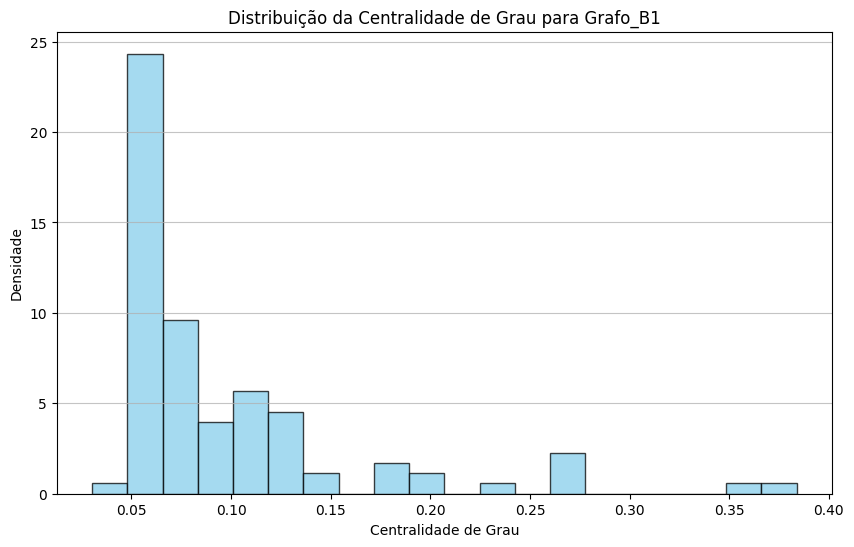


Algumas estatísticas da Centralidade de Grau para Grafo_B1:
  Número de nós: 100
  Mínimo: 0.0303
  Máximo: 0.3838
  Média: 0.0960
  Mediana: 0.0707
  Desvio Padrão: 0.0655


In [533]:
# 1. Calcular a centralidade de grau para Grafo_B1
if 'Grafo_B1' in locals() or 'Grafo_B1' in globals():
    if isinstance(Grafo_B1, nx.Graph):
        degree_centrality_values = list(nx.degree_centrality(Grafo_B1).values())

        # 2. Plotar a distribuição
        plt.figure(figsize=(10, 6))
        plt.hist(degree_centrality_values, bins=20, alpha=0.75, color='skyblue', edgecolor='black', density=True)
        plt.title("Distribuição da Centralidade de Grau para Grafo_B1")
        plt.xlabel("Centralidade de Grau")
        plt.ylabel("Densidade")
        plt.grid(axis='y', alpha=0.75)
        plt.show()

        # Para verificação, vamos imprimir algumas estatísticas resumo dos valores de centralidade
        if degree_centrality_values:
            print(f"\nAlgumas estatísticas da Centralidade de Grau para Grafo_B1:")
            print(f"  Número de nós: {len(degree_centrality_values)}")
            print(f"  Mínimo: {np.min(degree_centrality_values):.4f}")
            print(f"  Máximo: {np.max(degree_centrality_values):.4f}")
            print(f"  Média: {np.mean(degree_centrality_values):.4f}")
            print(f"  Mediana: {np.median(degree_centrality_values):.4f}")
            print(f"  Desvio Padrão: {np.std(degree_centrality_values):.4f}")

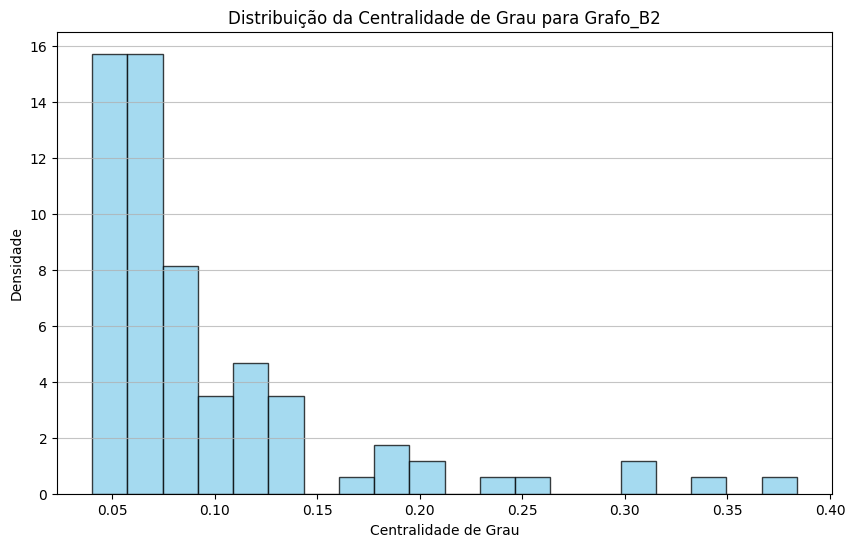


Algumas estatísticas da Centralidade de Grau para Grafo_B2:
  Número de nós: 100
  Mínimo: 0.0404
  Máximo: 0.3838
  Média: 0.0960
  Mediana: 0.0707
  Desvio Padrão: 0.0659


In [534]:
# 1. Calcular a centralidade de grau para Grafo_B2
if 'Grafo_B2' in locals() or 'Grafo_B2' in globals():
    if isinstance(Grafo_B2, nx.Graph):
        degree_centrality_values = list(nx.degree_centrality(Grafo_B2).values())

        # 2. Plotar a distribuição
        plt.figure(figsize=(10, 6))
        plt.hist(degree_centrality_values, bins=20, alpha=0.75, color='skyblue', edgecolor='black', density=True)
        plt.title("Distribuição da Centralidade de Grau para Grafo_B2")
        plt.xlabel("Centralidade de Grau")
        plt.ylabel("Densidade")
        plt.grid(axis='y', alpha=0.75)
        plt.show()


        # Para verificação, vamos imprimir algumas estatísticas resumo dos valores de centralidade
        if degree_centrality_values:
            print(f"\nAlgumas estatísticas da Centralidade de Grau para Grafo_B2:")
            print(f"  Número de nós: {len(degree_centrality_values)}")
            print(f"  Mínimo: {np.min(degree_centrality_values):.4f}")
            print(f"  Máximo: {np.max(degree_centrality_values):.4f}")
            print(f"  Média: {np.mean(degree_centrality_values):.4f}")
            print(f"  Mediana: {np.median(degree_centrality_values):.4f}")
            print(f"  Desvio Padrão: {np.std(degree_centrality_values):.4f}")

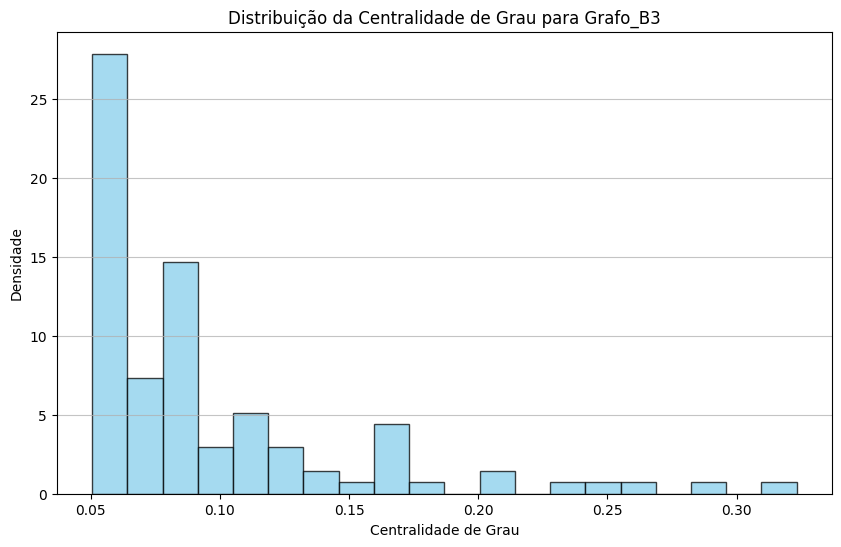


Algumas estatísticas da Centralidade de Grau para Grafo_B3:
  Número de nós: 100
  Mínimo: 0.0505
  Máximo: 0.3232
  Média: 0.0960
  Mediana: 0.0808
  Desvio Padrão: 0.0558


In [535]:
# 1. Calcular a centralidade de grau para Grafo_B1
if 'Grafo_B3' in locals() or 'Grafo_B3' in globals():
    if isinstance(Grafo_B3, nx.Graph):
        degree_centrality_values = list(nx.degree_centrality(Grafo_B3).values())

        # 2. Plotar a distribuição
        plt.figure(figsize=(10, 6))
        plt.hist(degree_centrality_values, bins=20, alpha=0.75, color='skyblue', edgecolor='black', density=True)
        plt.title("Distribuição da Centralidade de Grau para Grafo_B3")
        plt.xlabel("Centralidade de Grau")
        plt.ylabel("Densidade")
        plt.grid(axis='y', alpha=0.75)
        plt.show()

        # Para verificação, vamos imprimir algumas estatísticas resumo dos valores de centralidade
        if degree_centrality_values:
            print(f"\nAlgumas estatísticas da Centralidade de Grau para Grafo_B3:")
            print(f"  Número de nós: {len(degree_centrality_values)}")
            print(f"  Mínimo: {np.min(degree_centrality_values):.4f}")
            print(f"  Máximo: {np.max(degree_centrality_values):.4f}")
            print(f"  Média: {np.mean(degree_centrality_values):.4f}")
            print(f"  Mediana: {np.median(degree_centrality_values):.4f}")
            print(f"  Desvio Padrão: {np.std(degree_centrality_values):.4f}")

####Distribuição de grau

<Figure size 1000x600 with 0 Axes>

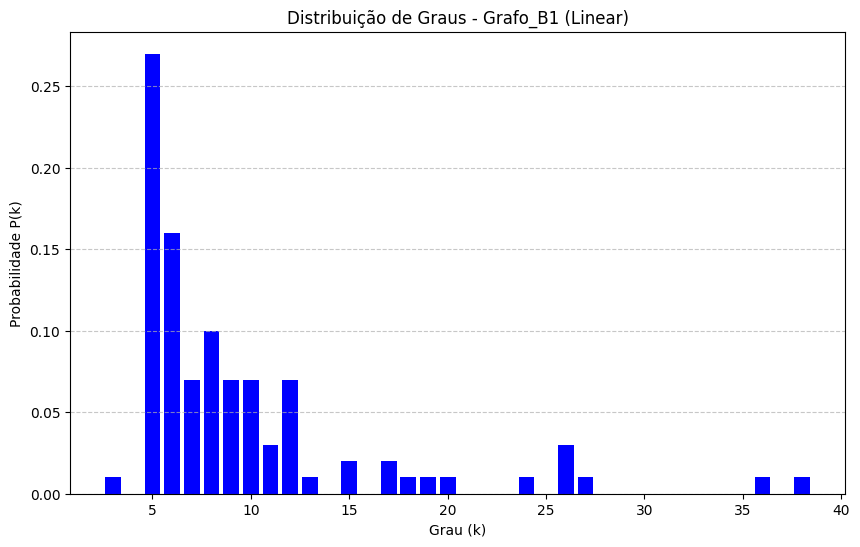

In [536]:
plot_degree_distribution(Grafo_B1, "Grafo_B1")

<Figure size 1000x600 with 0 Axes>

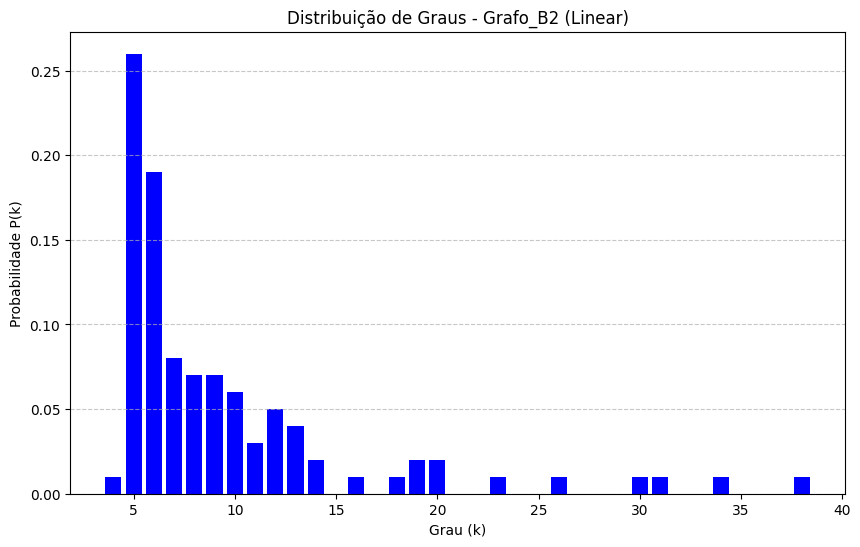

In [537]:
plot_degree_distribution(Grafo_B2, "Grafo_B2")

<Figure size 1000x600 with 0 Axes>

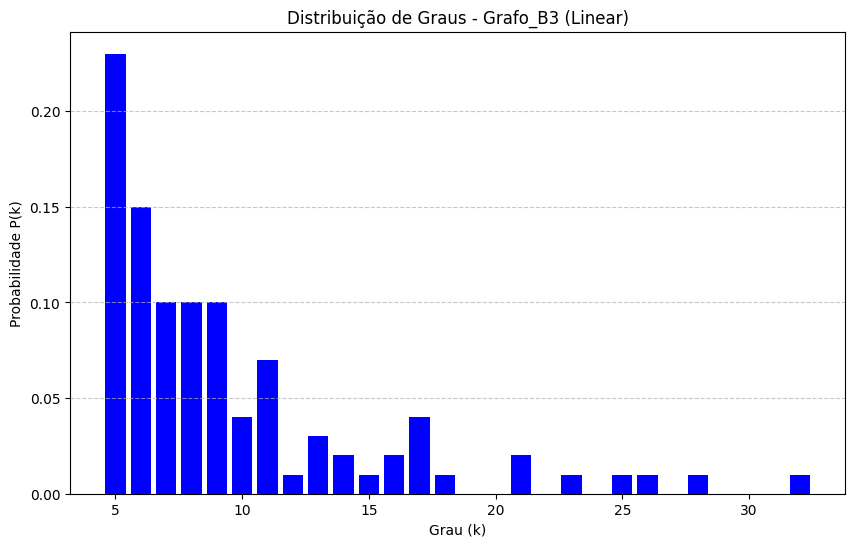

In [538]:
plot_degree_distribution(Grafo_B3, "Grafo_B3")

###2.1.2. Watts-Strogatz (redes small world)

(n = vértices, k = número de vizinhos para os quais cada nó está conectado no grafo inicial, p = probabilidade de religamento, seed)

In [700]:
# Parameters for Watts-Strogatz graph
n = 100
k = 15
p = 0.8

####Grafos

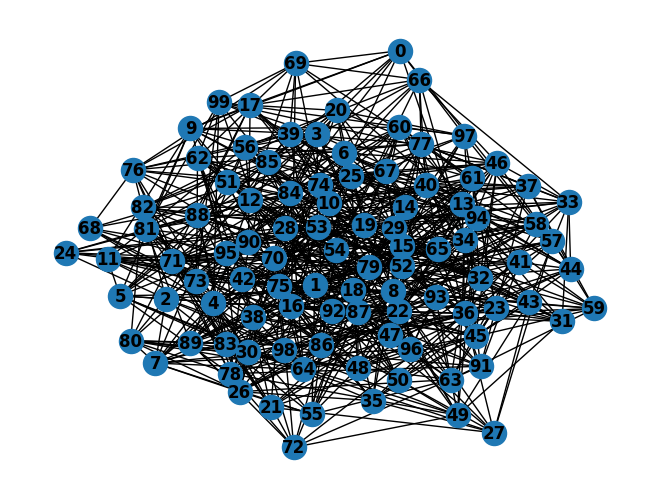

In [701]:
Grafo_W1 = nx.watts_strogatz_graph(n, k, p, seed = 24003315)
nx.draw(Grafo_W1, with_labels = True, font_weight = 'bold')
plt.show()

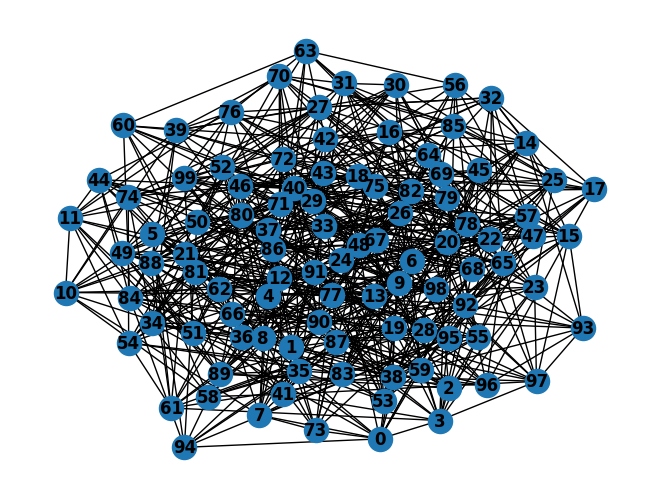

In [702]:
Grafo_W2 = nx.watts_strogatz_graph(n, k, p, seed = 24002125)
nx.draw(Grafo_W2, with_labels = True, font_weight = 'bold')
plt.show()

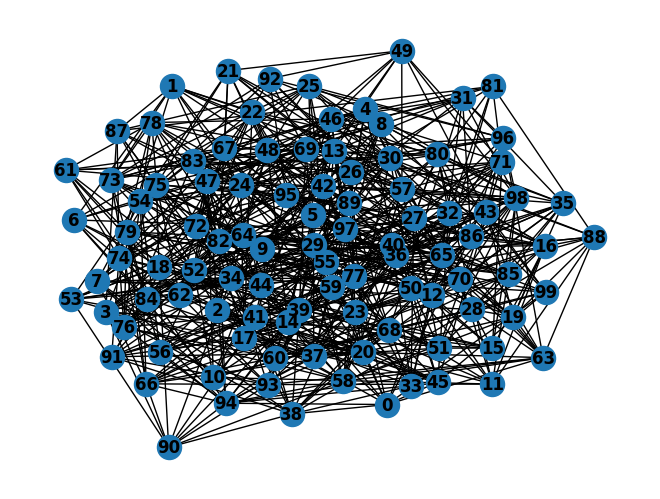

In [703]:
Grafo_W3 = nx.watts_strogatz_graph(n, k, p, seed = 23027619)
nx.draw(Grafo_W3, with_labels = True, font_weight = 'bold')
plt.show()

####Medidas de centralidade

In [704]:
degree_centrality = nx.degree_centrality(Grafo_W1)
closeness_centrality = nx.closeness_centrality(Grafo_W1)
betweenness_centrality = nx.betweenness_centrality(Grafo_W1)
eigenvector_centrality = nx.eigenvector_centrality(Grafo_W1)
pagerank = nx.pagerank(Grafo_W1)

def get_top_three(centrality_dict):
  """Sorts a centrality dictionary and returns the top three entries."""
  sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
  return sorted_centrality[:3]

top_three_degree = get_top_three(degree_centrality)
top_three_closeness = get_top_three(closeness_centrality)
top_three_betweenness = get_top_three(betweenness_centrality)
top_three_eigenvector = get_top_three(eigenvector_centrality)
top_three_pagerank = get_top_three(pagerank)

print("Top 3 Centralidade de Grau:", top_three_degree)
print("Top 3 Centralidade de Proximidade:", top_three_closeness)
print("Top 3 Centralidade de Intermediação:", top_three_betweenness)
print("Top 3 Centralidade de Autovetor:", top_three_eigenvector)
print("Top 3 PageRank:", top_three_pagerank)

Top 3 Centralidade de Grau: [(53, 0.20202020202020204), (54, 0.20202020202020204), (8, 0.18181818181818182)]
Top 3 Centralidade de Proximidade: [(53, 0.5469613259668509), (92, 0.5439560439560439), (8, 0.5380434782608695)]
Top 3 Centralidade de Intermediação: [(54, 0.021079592722677083), (53, 0.019139493659112224), (34, 0.017470149428059887)]
Top 3 Centralidade de Autovetor: [(53, 0.1484828504115661), (54, 0.13961459120398367), (22, 0.1342428692922043)]
Top 3 PageRank: [(54, 0.0136645263523476), (53, 0.013534997110562526), (70, 0.012458302080611421)]


In [705]:
degree_centrality = nx.degree_centrality(Grafo_W2)
closeness_centrality = nx.closeness_centrality(Grafo_W2)
betweenness_centrality = nx.betweenness_centrality(Grafo_W2)
eigenvector_centrality = nx.eigenvector_centrality(Grafo_W2)
pagerank = nx.pagerank(Grafo_W2)

def get_top_three(centrality_dict):
  """Sorts a centrality dictionary and returns the top three entries."""
  sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
  return sorted_centrality[:3]

top_three_degree = get_top_three(degree_centrality)
top_three_closeness = get_top_three(closeness_centrality)
top_three_betweenness = get_top_three(betweenness_centrality)
top_three_eigenvector = get_top_three(eigenvector_centrality)
top_three_pagerank = get_top_three(pagerank)

print("Top 3 Centralidade de Grau:", top_three_degree)
print("Top 3 Centralidade de Proximidade:", top_three_closeness)
print("Top 3 Centralidade de Intermediação:", top_three_betweenness)
print("Top 3 Centralidade de Autovetor:", top_three_eigenvector)
print("Top 3 PageRank:", top_three_pagerank)

Top 3 Centralidade de Grau: [(77, 0.21212121212121213), (8, 0.19191919191919193), (19, 0.19191919191919193)]
Top 3 Centralidade de Proximidade: [(77, 0.55), (33, 0.5469613259668509), (86, 0.5409836065573771)]
Top 3 Centralidade de Intermediação: [(77, 0.02545006108910858), (86, 0.018144179735097504), (71, 0.017898752114856958)]
Top 3 Centralidade de Autovetor: [(77, 0.14156429176586313), (19, 0.13640099155576357), (8, 0.134171676020493)]
Top 3 PageRank: [(77, 0.014334291621073993), (71, 0.013064769624245196), (8, 0.013008825435005787)]


In [706]:
degree_centrality = nx.degree_centrality(Grafo_W3)
closeness_centrality = nx.closeness_centrality(Grafo_W3)
betweenness_centrality = nx.betweenness_centrality(Grafo_W3)
eigenvector_centrality = nx.eigenvector_centrality(Grafo_W3)
pagerank = nx.pagerank(Grafo_W3)

def get_top_three(centrality_dict):
  """Sorts a centrality dictionary and returns the top three entries."""
  sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
  return sorted_centrality[:3]

top_three_degree = get_top_three(degree_centrality)
top_three_closeness = get_top_three(closeness_centrality)
top_three_betweenness = get_top_three(betweenness_centrality)
top_three_eigenvector = get_top_three(eigenvector_centrality)
top_three_pagerank = get_top_three(pagerank)

print("Top 3 Centralidade de Grau:", top_three_degree)
print("Top 3 Centralidade de Proximidade:", top_three_closeness)
print("Top 3 Centralidade de Intermediação:", top_three_betweenness)
print("Top 3 Centralidade de Autovetor:", top_three_eigenvector)
print("Top 3 PageRank:", top_three_pagerank)

Top 3 Centralidade de Grau: [(97, 0.20202020202020204), (30, 0.19191919191919193), (95, 0.19191919191919193)]
Top 3 Centralidade de Proximidade: [(95, 0.55), (30, 0.5469613259668509), (97, 0.5469613259668509)]
Top 3 Centralidade de Intermediação: [(97, 0.021176187620147335), (95, 0.01895055641808022), (39, 0.01717065437900215)]
Top 3 Centralidade de Autovetor: [(97, 0.139139124329228), (30, 0.1390924987021151), (42, 0.13523428809506166)]
Top 3 PageRank: [(97, 0.013676431426802287), (95, 0.013101032881189278), (30, 0.012982247212339251)]


####Medidas de caminho e distância

In [707]:
if nx.is_connected(Grafo_W1):
    diameter = nx.diameter(Grafo_W1)
    radius = nx.radius(Grafo_W1)
    avg_path_length = nx.average_shortest_path_length(Grafo_W1)
    print("Diâmetro:", diameter)
    print("Raio:", radius)
    print("Caminho Médio:", avg_path_length)
else:
    print("O grafo não é conexo. Analisando a maior componente conexa...")
    largest_cc = max(nx.connected_components(Grafo_W1), key=len)
    subgraph = Grafo_W1.subgraph(largest_cc)
    diameter = nx.diameter(subgraph)
    radius = nx.radius(subgraph)
    avg_path_length = nx.average_shortest_path_length(subgraph)
    print("Diâmetro da maior componente:", diameter)
    print("Raio da maior componente:", radius)
    print("Caminho Médio da maior componente:", avg_path_length)

# Exemplo de menor caminho entre dois nós
shortest_path = nx.shortest_path(Grafo_W1, 0, 99)
print("Menor caminho entre nó 0 e 99:", shortest_path)

Diâmetro: 3
Raio: 3
Caminho Médio: 1.9725252525252526
Menor caminho entre nó 0 e 99: [0, 97, 99]


In [708]:
if nx.is_connected(Grafo_W2):
    diameter = nx.diameter(Grafo_W2)
    radius = nx.radius(Grafo_W2)
    avg_path_length = nx.average_shortest_path_length(Grafo_W2)
    print("Diâmetro:", diameter)
    print("Raio:", radius)
    print("Caminho Médio:", avg_path_length)
else:
    print("O grafo não é conexo. Analisando a maior componente conexa...")
    largest_cc = max(nx.connected_components(Grafo_W2), key=len)
    subgraph = Grafo_W2.subgraph(largest_cc)
    diameter = nx.diameter(subgraph)
    radius = nx.radius(subgraph)
    avg_path_length = nx.average_shortest_path_length(subgraph)
    print("Diâmetro da maior componente:", diameter)
    print("Raio da maior componente:", radius)
    print("Caminho Médio da maior componente:", avg_path_length)

# Exemplo de menor caminho entre dois nós
shortest_path = nx.shortest_path(Grafo_W2, 0, 99)
print("Menor caminho entre nó 0 e 99:", shortest_path)

Diâmetro: 3
Raio: 3
Caminho Médio: 1.9632323232323232
Menor caminho entre nó 0 e 99: [0, 51, 99]


In [709]:
if nx.is_connected(Grafo_W3):
    diameter = nx.diameter(Grafo_W3)
    radius = nx.radius(Grafo_W3)
    avg_path_length = nx.average_shortest_path_length(Grafo_W3)
    print("Diâmetro:", diameter)
    print("Raio:", radius)
    print("Caminho Médio:", avg_path_length)
else:
    print("O grafo não é conexo. Analisando a maior componente conexa...")
    largest_cc = max(nx.connected_components(Grafo_W3), key=len)
    subgraph = Grafo_W3.subgraph(largest_cc)
    diameter = nx.diameter(subgraph)
    radius = nx.radius(subgraph)
    avg_path_length = nx.average_shortest_path_length(subgraph)
    print("Diâmetro da maior componente:", diameter)
    print("Raio da maior componente:", radius)
    print("Caminho Médio da maior componente:", avg_path_length)

# Exemplo de menor caminho entre dois nós
shortest_path = nx.shortest_path(Grafo_W3, 0, 99)
print("Menor caminho entre nó 0 e 99:", shortest_path)

Diâmetro: 3
Raio: 3
Caminho Médio: 1.9656565656565657
Menor caminho entre nó 0 e 99: [0, 99]


####Medidas de conectividade

In [710]:
vertex_connectivity = nx.node_connectivity(Grafo_W1)
edge_connectivity = nx.edge_connectivity(Grafo_W1)
num_components = nx.number_connected_components(Grafo_W1)

print("Conectividade de Vértices:", vertex_connectivity)
print("Conectividade de Arestas:", edge_connectivity)
print("Número de Componentes Conectados:", num_components)

Conectividade de Vértices: 8
Conectividade de Arestas: 8
Número de Componentes Conectados: 1


In [711]:
vertex_connectivity = nx.node_connectivity(Grafo_W2)
edge_connectivity = nx.edge_connectivity(Grafo_W2)
num_components = nx.number_connected_components(Grafo_W2)

print("Conectividade de Vértices:", vertex_connectivity)
print("Conectividade de Arestas:", edge_connectivity)
print("Número de Componentes Conectados:", num_components)

Conectividade de Vértices: 9
Conectividade de Arestas: 9
Número de Componentes Conectados: 1


In [712]:
vertex_connectivity = nx.node_connectivity(Grafo_W3)
edge_connectivity = nx.edge_connectivity(Grafo_W3)
num_components = nx.number_connected_components(Grafo_W3)

print("Conectividade de Vértices:", vertex_connectivity)
print("Conectividade de Arestas:", edge_connectivity)
print("Número de Componentes Conectados:", num_components)

Conectividade de Vértices: 9
Conectividade de Arestas: 9
Número de Componentes Conectados: 1


####Coeficiente de agrupamento

In [713]:
# 1. Calcular o Coeficiente de Agrupamento Médio
average_clustering = nx.average_clustering(Grafo_W1)
print(f"Coeficiente de Agrupamento Médio: {average_clustering}")

# 2. Calcular o Coeficiente de Agrupamento Local para cada nó
local_clustering = nx.clustering(Grafo_W1)
print("\nCoeficiente de Agrupamento Local para cada nó:")
for node, cc in local_clustering.items():
    print(f"Nó {node}: {cc}")

Coeficiente de Agrupamento Médio: 0.13203368183244332

Coeficiente de Agrupamento Local para cada nó:
Nó 0: 0.13333333333333333
Nó 1: 0.10476190476190476
Nó 2: 0.14285714285714285
Nó 3: 0.14285714285714285
Nó 4: 0.15
Nó 5: 0.0989010989010989
Nó 6: 0.07575757575757576
Nó 7: 0.19047619047619047
Nó 8: 0.1503267973856209
Nó 9: 0.1282051282051282
Nó 10: 0.10833333333333334
Nó 11: 0.16666666666666666
Nó 12: 0.08823529411764706
Nó 13: 0.12087912087912088
Nó 14: 0.08974358974358974
Nó 15: 0.11666666666666667
Nó 16: 0.18333333333333332
Nó 17: 0.13636363636363635
Nó 18: 0.08571428571428572
Nó 19: 0.10476190476190476
Nó 20: 0.15384615384615385
Nó 21: 0.13333333333333333
Nó 22: 0.16339869281045752
Nó 23: 0.11538461538461539
Nó 24: 0.14285714285714285
Nó 25: 0.10833333333333334
Nó 26: 0.1503267973856209
Nó 27: 0.1111111111111111
Nó 28: 0.1282051282051282
Nó 29: 0.15384615384615385
Nó 30: 0.1282051282051282
Nó 31: 0.09090909090909091
Nó 32: 0.13186813186813187
Nó 33: 0.17142857142857143
Nó 34: 0.137

In [714]:
# 1. Calcular o Coeficiente de Agrupamento Médio
average_clustering = nx.average_clustering(Grafo_W2)
print(f"Coeficiente de Agrupamento Médio: {average_clustering}")

# 2. Calcular o Coeficiente de Agrupamento Local para cada nó
local_clustering = nx.clustering(Grafo_W2)
print("\nCoeficiente de Agrupamento Local para cada nó:")
for node, cc in local_clustering.items():
    print(f"Nó {node}: {cc}")

Coeficiente de Agrupamento Médio: 0.1272075680597351

Coeficiente de Agrupamento Local para cada nó:
Nó 0: 0.08791208791208792
Nó 1: 0.11428571428571428
Nó 2: 0.13636363636363635
Nó 3: 0.18095238095238095
Nó 4: 0.11428571428571428
Nó 5: 0.07692307692307693
Nó 6: 0.0989010989010989
Nó 7: 0.0641025641025641
Nó 8: 0.16374269005847952
Nó 9: 0.09166666666666666
Nó 10: 0.15151515151515152
Nó 11: 0.15151515151515152
Nó 12: 0.07575757575757576
Nó 13: 0.11428571428571428
Nó 14: 0.1282051282051282
Nó 15: 0.17582417582417584
Nó 16: 0.2
Nó 17: 0.09090909090909091
Nó 18: 0.07692307692307693
Nó 19: 0.12280701754385964
Nó 20: 0.14705882352941177
Nó 21: 0.10989010989010989
Nó 22: 0.0989010989010989
Nó 23: 0.15151515151515152
Nó 24: 0.09166666666666666
Nó 25: 0.16666666666666666
Nó 26: 0.1503267973856209
Nó 27: 0.1282051282051282
Nó 28: 0.125
Nó 29: 0.125
Nó 30: 0.21794871794871795
Nó 31: 0.19696969696969696
Nó 32: 0.11538461538461539
Nó 33: 0.1111111111111111
Nó 34: 0.10606060606060606
Nó 35: 0.121212

In [715]:
# 1. Calcular o Coeficiente de Agrupamento Médio
average_clustering = nx.average_clustering(Grafo_W3)
print(f"Coeficiente de Agrupamento Médio: {average_clustering}")

# 2. Calcular o Coeficiente de Agrupamento Local para cada nó
local_clustering = nx.clustering(Grafo_W3)
print("\nCoeficiente de Agrupamento Local para cada nó:")
for node, cc in local_clustering.items():
    print(f"Nó {node}: {cc}")

Coeficiente de Agrupamento Médio: 0.12558629124573384

Coeficiente de Agrupamento Local para cada nó:
Nó 0: 0.14102564102564102
Nó 1: 0.10606060606060606
Nó 2: 0.06666666666666667
Nó 3: 0.20512820512820512
Nó 4: 0.10989010989010989
Nó 5: 0.1
Nó 6: 0.08888888888888889
Nó 7: 0.16666666666666666
Nó 8: 0.1523809523809524
Nó 9: 0.14285714285714285
Nó 10: 0.14545454545454545
Nó 11: 0.07575757575757576
Nó 12: 0.1619047619047619
Nó 13: 0.125
Nó 14: 0.15
Nó 15: 0.14545454545454545
Nó 16: 0.18095238095238095
Nó 17: 0.0989010989010989
Nó 18: 0.19696969696969696
Nó 19: 0.19696969696969696
Nó 20: 0.11029411764705882
Nó 21: 0.09090909090909091
Nó 22: 0.1978021978021978
Nó 23: 0.08974358974358974
Nó 24: 0.08333333333333333
Nó 25: 0.10989010989010989
Nó 26: 0.10606060606060606
Nó 27: 0.08791208791208792
Nó 28: 0.125
Nó 29: 0.08333333333333333
Nó 30: 0.11695906432748537
Nó 31: 0.21818181818181817
Nó 32: 0.07575757575757576
Nó 33: 0.12727272727272726
Nó 34: 0.12380952380952381
Nó 35: 0.17582417582417584

####Coeficiente de assortatividade

In [716]:
assortativity = nx.degree_assortativity_coefficient(Grafo_W1)
print(f"Coeficiente de Assortatividade: {assortativity}")

Coeficiente de Assortatividade: -0.004857332932350658


In [717]:
assortativity = nx.degree_assortativity_coefficient(Grafo_W2)
print(f"Coeficiente de Assortatividade: {assortativity}")

Coeficiente de Assortatividade: -0.050479960671688695


In [718]:
assortativity = nx.degree_assortativity_coefficient(Grafo_W3)
print(f"Coeficiente de Assortatividade: {assortativity}")

Coeficiente de Assortatividade: -0.01892975853224817


####Distribuição da centralidade de grau

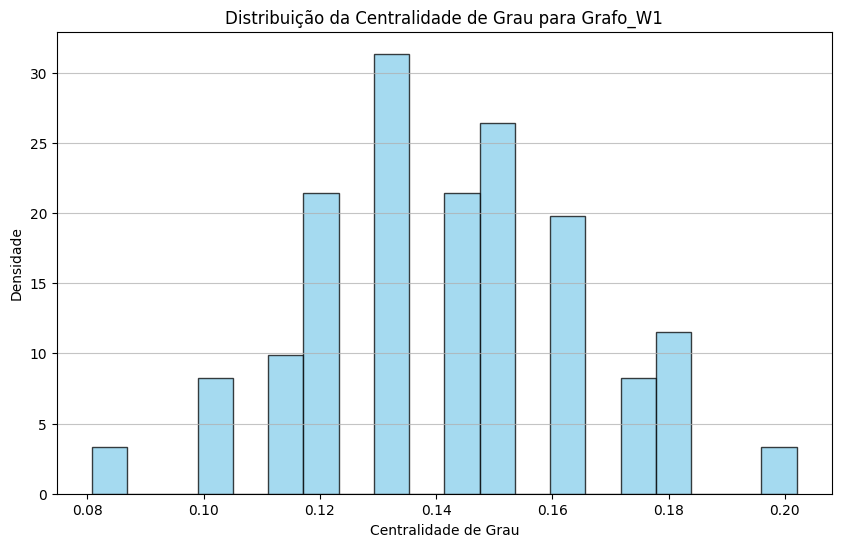

Histograma da distribuição de centralidade de grau para Grafo_W1 gerado e salvo como distribuicao_centralidade_Grafo_W1.png.

Algumas estatísticas da Centralidade de Grau para Grafo_W1:
  Número de nós: 100
  Mínimo: 0.0808
  Máximo: 0.2020
  Média: 0.1414
  Mediana: 0.1414
  Desvio Padrão: 0.0241


In [719]:
# 1. Calcular a centralidade de grau para Grafo_W1
if 'Grafo_W1' in locals() or 'Grafo_W1' in globals():
    if isinstance(Grafo_W1, nx.Graph):
        degree_centrality_values = list(nx.degree_centrality(Grafo_W1).values())

        # 2. Plotar a distribuição
        plt.figure(figsize=(10, 6))
        plt.hist(degree_centrality_values, bins=20, alpha=0.75, color='skyblue', edgecolor='black', density=True)
        plt.title("Distribuição da Centralidade de Grau para Grafo_W1")
        plt.xlabel("Centralidade de Grau")
        plt.ylabel("Densidade")
        plt.grid(axis='y', alpha=0.75)

        # Salvar o gráfico em um arquivo
        plt.savefig("distribuicao_centralidade_Grafo_W1.png")
        plt.show()

        print("Histograma da distribuição de centralidade de grau para Grafo_W1 gerado e salvo como distribuicao_centralidade_Grafo_W1.png.")

        # Para verificação, vamos imprimir algumas estatísticas resumo dos valores de centralidade
        if degree_centrality_values:
            print(f"\nAlgumas estatísticas da Centralidade de Grau para Grafo_W1:")
            print(f"  Número de nós: {len(degree_centrality_values)}")
            print(f"  Mínimo: {np.min(degree_centrality_values):.4f}")
            print(f"  Máximo: {np.max(degree_centrality_values):.4f}")
            print(f"  Média: {np.mean(degree_centrality_values):.4f}")
            print(f"  Mediana: {np.median(degree_centrality_values):.4f}")
            print(f"  Desvio Padrão: {np.std(degree_centrality_values):.4f}")

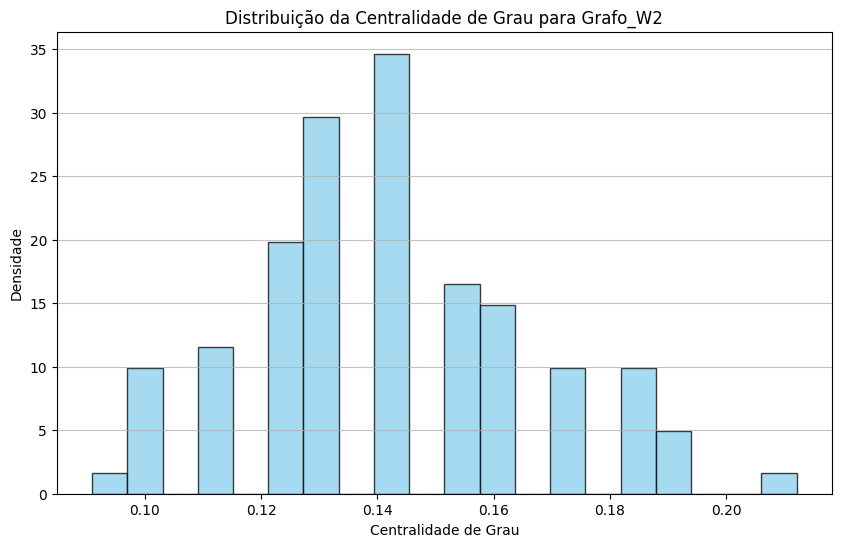


Algumas estatísticas da Centralidade de Grau para Grafo_W2:
  Número de nós: 100
  Mínimo: 0.0909
  Máximo: 0.2121
  Média: 0.1414
  Mediana: 0.1414
  Desvio Padrão: 0.0241


In [720]:
# 1. Calcular a centralidade de grau para Grafo_W1
if 'Grafo_W2' in locals() or 'Grafo_W2' in globals():
    if isinstance(Grafo_W2, nx.Graph):
        degree_centrality_values = list(nx.degree_centrality(Grafo_W2).values())

        # 2. Plotar a distribuição
        plt.figure(figsize=(10, 6))
        plt.hist(degree_centrality_values, bins=20, alpha=0.75, color='skyblue', edgecolor='black', density=True)
        plt.title("Distribuição da Centralidade de Grau para Grafo_W2")
        plt.xlabel("Centralidade de Grau")
        plt.ylabel("Densidade")
        plt.grid(axis='y', alpha=0.75)
        plt.show()

        # Para verificação, vamos imprimir algumas estatísticas resumo dos valores de centralidade
        if degree_centrality_values:
            print(f"\nAlgumas estatísticas da Centralidade de Grau para Grafo_W2:")
            print(f"  Número de nós: {len(degree_centrality_values)}")
            print(f"  Mínimo: {np.min(degree_centrality_values):.4f}")
            print(f"  Máximo: {np.max(degree_centrality_values):.4f}")
            print(f"  Média: {np.mean(degree_centrality_values):.4f}")
            print(f"  Mediana: {np.median(degree_centrality_values):.4f}")
            print(f"  Desvio Padrão: {np.std(degree_centrality_values):.4f}")

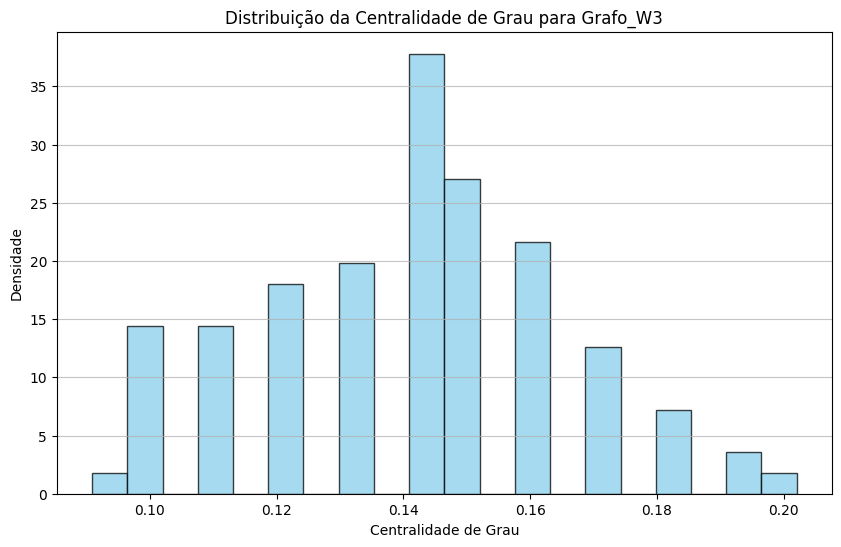


Algumas estatísticas da Centralidade de Grau para Grafo_W3:
  Número de nós: 100
  Mínimo: 0.0909
  Máximo: 0.2020
  Média: 0.1414
  Mediana: 0.1414
  Desvio Padrão: 0.0237


In [721]:
# 1. Calcular a centralidade de grau para Grafo_W3
if 'Grafo_W3' in locals() or 'Grafo_W3' in globals():
    if isinstance(Grafo_W3, nx.Graph):
        degree_centrality_values = list(nx.degree_centrality(Grafo_W3).values())

        # 2. Plotar a distribuição
        plt.figure(figsize=(10, 6))
        plt.hist(degree_centrality_values, bins=20, alpha=0.75, color='skyblue', edgecolor='black', density=True)
        plt.title("Distribuição da Centralidade de Grau para Grafo_W3")
        plt.xlabel("Centralidade de Grau")
        plt.ylabel("Densidade")
        plt.grid(axis='y', alpha=0.75)
        plt.show()


        # Para verificação, vamos imprimir algumas estatísticas resumo dos valores de centralidade
        if degree_centrality_values:
            print(f"\nAlgumas estatísticas da Centralidade de Grau para Grafo_W3:")
            print(f"  Número de nós: {len(degree_centrality_values)}")
            print(f"  Mínimo: {np.min(degree_centrality_values):.4f}")
            print(f"  Máximo: {np.max(degree_centrality_values):.4f}")
            print(f"  Média: {np.mean(degree_centrality_values):.4f}")
            print(f"  Mediana: {np.median(degree_centrality_values):.4f}")
            print(f"  Desvio Padrão: {np.std(degree_centrality_values):.4f}")

####Distribuição de grau

<Figure size 1000x600 with 0 Axes>

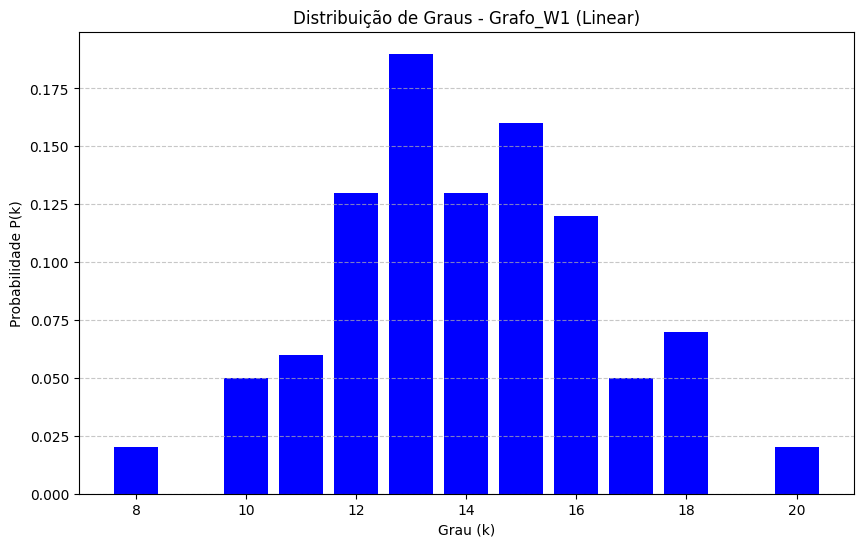

In [722]:
plot_degree_distribution(Grafo_W1, "Grafo_W1")

<Figure size 1000x600 with 0 Axes>

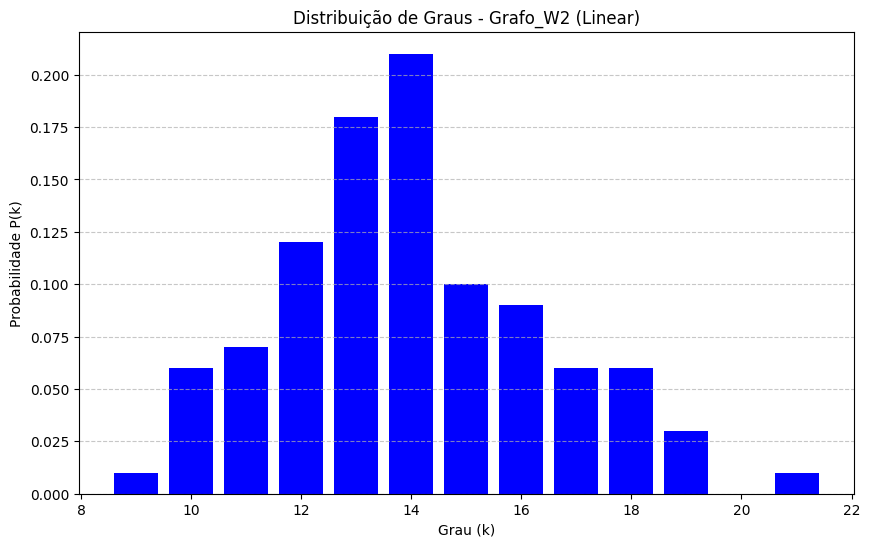

In [723]:
plot_degree_distribution(Grafo_W2, "Grafo_W2")

<Figure size 1000x600 with 0 Axes>

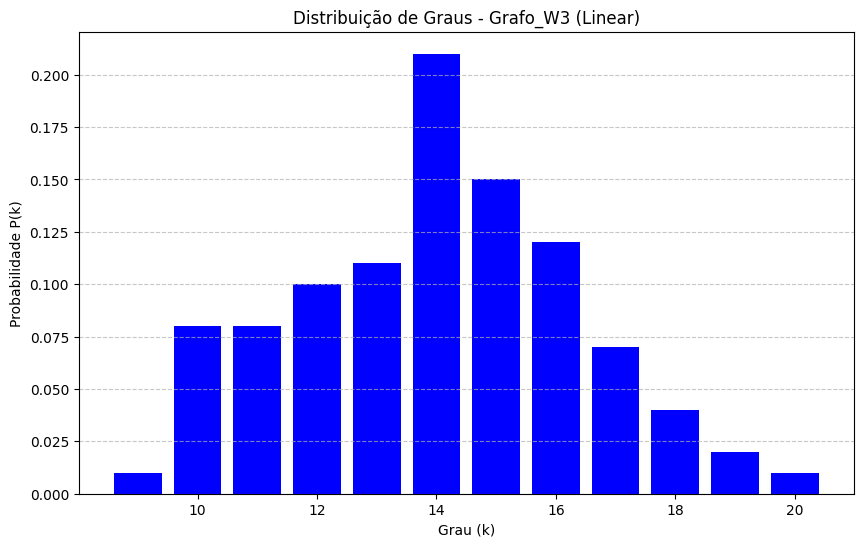

In [724]:
plot_degree_distribution(Grafo_W3, "Grafo_W3")

###2.1.3. Erdös-Renyi (redes aleatórias)

(n = número total de nós , p = probabilidade de que qualquer par de nós no grafo seja conectado por uma aresta, seed, directed = direcionado ou não)

In [755]:
# Parameters for Watts-Strogatz graph
n = 100
p = 0.1

####Grafos

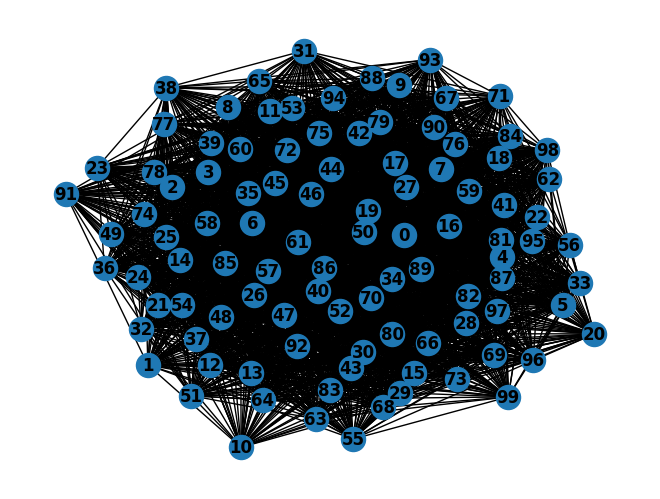

In [756]:
Grafo_E1 = nx.erdos_renyi_graph(n, p, seed = 24003315, directed = False)
nx.draw(Grafo_E1, with_labels = True, font_weight = 'bold')
plt.show()

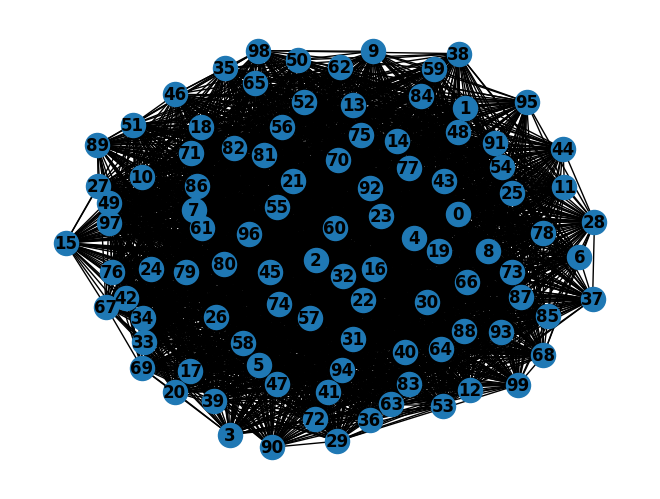

In [757]:
Grafo_E2 = nx.erdos_renyi_graph(n, p, seed = 24002125, directed = False)
nx.draw(Grafo_E2, with_labels = True, font_weight = 'bold')
plt.show()

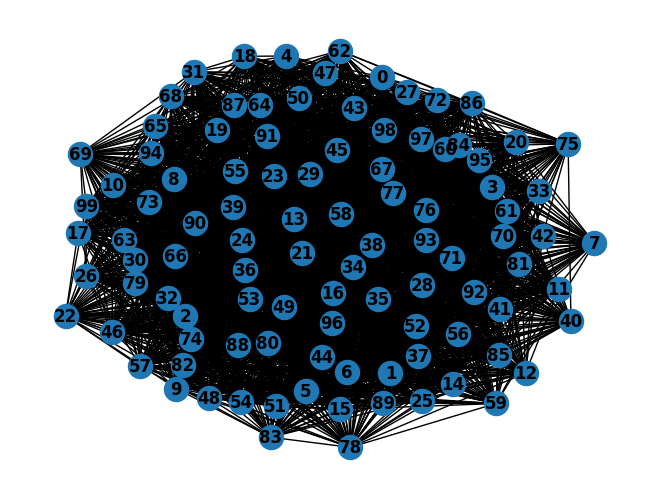

In [758]:
Grafo_E3 = nx.erdos_renyi_graph(n, p, seed = 23027619, directed = False)
nx.draw(Grafo_E3, with_labels = True, font_weight = 'bold')
plt.show()

####Medidas de centralidade

In [759]:
degree_centrality = nx.degree_centrality(Grafo_E1)
closeness_centrality = nx.closeness_centrality(Grafo_E1)
betweenness_centrality = nx.betweenness_centrality(Grafo_E1)
eigenvector_centrality = nx.eigenvector_centrality(Grafo_E1)
pagerank = nx.pagerank(Grafo_E1)

def get_top_three(centrality_dict):
  """Sorts a centrality dictionary and returns the top three entries."""
  sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
  return sorted_centrality[:3]

top_three_degree = get_top_three(degree_centrality)
top_three_closeness = get_top_three(closeness_centrality)
top_three_betweenness = get_top_three(betweenness_centrality)
top_three_eigenvector = get_top_three(eigenvector_centrality)
top_three_pagerank = get_top_three(pagerank)

print("Top 3 Centralidade de Grau:", top_three_degree)
print("Top 3 Centralidade de Proximidade:", top_three_closeness)
print("Top 3 Centralidade de Intermediação:", top_three_betweenness)
print("Top 3 Centralidade de Autovetor:", top_three_eigenvector)
print("Top 3 PageRank:", top_three_pagerank)

Top 3 Centralidade de Grau: [(0, 0.696969696969697), (35, 0.696969696969697), (25, 0.686868686868687)]
Top 3 Centralidade de Proximidade: [(0, 0.7674418604651163), (35, 0.7674418604651163), (25, 0.7615384615384615)]
Top 3 Centralidade de Intermediação: [(35, 0.005995340038193237), (25, 0.005681137210479408), (47, 0.0055961390619709405)]
Top 3 Centralidade de Autovetor: [(0, 0.1185308531587245), (35, 0.1158103620879354), (25, 0.11512868531984297)]
Top 3 PageRank: [(35, 0.011503731117430008), (0, 0.011466516627853985), (25, 0.011348859007199707)]


In [760]:
degree_centrality = nx.degree_centrality(Grafo_E2)
closeness_centrality = nx.closeness_centrality(Grafo_E2)
betweenness_centrality = nx.betweenness_centrality(Grafo_E2)
eigenvector_centrality = nx.eigenvector_centrality(Grafo_E2)
pagerank = nx.pagerank(Grafo_E2)

def get_top_three(centrality_dict):
  """Sorts a centrality dictionary and returns the top three entries."""
  sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
  return sorted_centrality[:3]

top_three_degree = get_top_three(degree_centrality)
top_three_closeness = get_top_three(closeness_centrality)
top_three_betweenness = get_top_three(betweenness_centrality)
top_three_eigenvector = get_top_three(eigenvector_centrality)
top_three_pagerank = get_top_three(pagerank)

print("Top 3 Centralidade de Grau:", top_three_degree)
print("Top 3 Centralidade de Proximidade:", top_three_closeness)
print("Top 3 Centralidade de Intermediação:", top_three_betweenness)
print("Top 3 Centralidade de Autovetor:", top_three_eigenvector)
print("Top 3 PageRank:", top_three_pagerank)

Top 3 Centralidade de Grau: [(92, 0.7171717171717172), (19, 0.696969696969697), (22, 0.696969696969697)]
Top 3 Centralidade de Proximidade: [(92, 0.7795275590551181), (19, 0.7674418604651163), (22, 0.7674418604651163)]
Top 3 Centralidade de Intermediação: [(92, 0.006442096335758003), (22, 0.005739044437836321), (2, 0.005594701487229774)]
Top 3 Centralidade de Autovetor: [(92, 0.11846057968892182), (19, 0.11750284402714425), (22, 0.11624755581283477)]
Top 3 PageRank: [(92, 0.011791194811697298), (22, 0.01148700884207101), (19, 0.011470729694102528)]


In [761]:
degree_centrality = nx.degree_centrality(Grafo_E3)
closeness_centrality = nx.closeness_centrality(Grafo_E3)
betweenness_centrality = nx.betweenness_centrality(Grafo_E3)
eigenvector_centrality = nx.eigenvector_centrality(Grafo_E3)
pagerank = nx.pagerank(Grafo_E3)

def get_top_three(centrality_dict):
  """Sorts a centrality dictionary and returns the top three entries."""
  sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
  return sorted_centrality[:3]

top_three_degree = get_top_three(degree_centrality)
top_three_closeness = get_top_three(closeness_centrality)
top_three_betweenness = get_top_three(betweenness_centrality)
top_three_eigenvector = get_top_three(eigenvector_centrality)
top_three_pagerank = get_top_three(pagerank)

print("Top 3 Centralidade de Grau:", top_three_degree)
print("Top 3 Centralidade de Proximidade:", top_three_closeness)
print("Top 3 Centralidade de Intermediação:", top_three_betweenness)
print("Top 3 Centralidade de Autovetor:", top_three_eigenvector)
print("Top 3 PageRank:", top_three_pagerank)

Top 3 Centralidade de Grau: [(38, 0.7171717171717172), (36, 0.696969696969697), (54, 0.696969696969697)]
Top 3 Centralidade de Proximidade: [(38, 0.7795275590551181), (36, 0.7674418604651163), (54, 0.7674418604651163)]
Top 3 Centralidade de Intermediação: [(36, 0.006181262188541854), (38, 0.006027339623371035), (54, 0.005696036955895751)]
Top 3 Centralidade de Autovetor: [(38, 0.1207624317857812), (54, 0.1173513678834328), (36, 0.11565420348810951)]
Top 3 PageRank: [(38, 0.011780824178608427), (36, 0.011514902189853474), (54, 0.011491675187934132)]


####Medidas de caminho e distância

In [762]:
if nx.is_connected(Grafo_E1):
    diameter = nx.diameter(Grafo_E1)
    radius = nx.radius(Grafo_E1)
    avg_path_length = nx.average_shortest_path_length(Grafo_E1)
    print("Diâmetro:", diameter)
    print("Raio:", radius)
    print("Caminho Médio:", avg_path_length)
else:
    print("O grafo não é conexo. Analisando a maior componente conexa...")
    largest_cc = max(nx.connected_components(Grafo_E1), key=len)
    subgraph = Grafo_E1.subgraph(largest_cc)
    diameter = nx.diameter(subgraph)
    radius = nx.radius(subgraph)
    avg_path_length = nx.average_shortest_path_length(subgraph)
    print("Diâmetro da maior componente:", diameter)
    print("Raio da maior componente:", radius)
    print("Caminho Médio da maior componente:", avg_path_length)

# Exemplo de menor caminho entre dois nós
shortest_path = nx.shortest_path(Grafo_E1, 0, 99)
print("Menor caminho entre nó 0 e 99:", shortest_path)

Diâmetro: 2
Raio: 2
Caminho Médio: 1.4068686868686868
Menor caminho entre nó 0 e 99: [0, 1, 99]


In [763]:
if nx.is_connected(Grafo_E2):
    diameter = nx.diameter(Grafo_E2)
    radius = nx.radius(Grafo_E2)
    avg_path_length = nx.average_shortest_path_length(Grafo_E2)
    print("Diâmetro:", diameter)
    print("Raio:", radius)
    print("Caminho Médio:", avg_path_length)
else:
    print("O grafo não é conexo. Analisando a maior componente conexa...")
    largest_cc = max(nx.connected_components(Grafo_E2), key=len)
    subgraph = Grafo_E2.subgraph(largest_cc)
    diameter = nx.diameter(subgraph)
    radius = nx.radius(subgraph)
    avg_path_length = nx.average_shortest_path_length(subgraph)
    print("Diâmetro da maior componente:", diameter)
    print("Raio da maior componente:", radius)
    print("Caminho Médio da maior componente:", avg_path_length)

# Exemplo de menor caminho entre dois nós
shortest_path = nx.shortest_path(Grafo_E2, 0, 99)
print("Menor caminho entre nó 0 e 99:", shortest_path)

Diâmetro: 2
Raio: 2
Caminho Médio: 1.4062626262626263
Menor caminho entre nó 0 e 99: [0, 1, 99]


In [764]:
if nx.is_connected(Grafo_E3):
    diameter = nx.diameter(Grafo_E3)
    radius = nx.radius(Grafo_E3)
    avg_path_length = nx.average_shortest_path_length(Grafo_E3)
    print("Diâmetro:", diameter)
    print("Raio:", radius)
    print("Caminho Médio:", avg_path_length)
else:
    print("O grafo não é conexo. Analisando a maior componente conexa...")
    largest_cc = max(nx.connected_components(Grafo_E3), key=len)
    subgraph = Grafo_E3.subgraph(largest_cc)
    diameter = nx.diameter(subgraph)
    radius = nx.radius(subgraph)
    avg_path_length = nx.average_shortest_path_length(subgraph)
    print("Diâmetro da maior componente:", diameter)
    print("Raio da maior componente:", radius)
    print("Caminho Médio da maior componente:", avg_path_length)

# Exemplo de menor caminho entre dois nós
shortest_path = nx.shortest_path(Grafo_E3, 0, 99)
print("Menor caminho entre nó 0 e 99:", shortest_path)

Diâmetro: 2
Raio: 2
Caminho Médio: 1.4072727272727272
Menor caminho entre nó 0 e 99: [0, 4, 99]


####Medidas de conectividade

In [765]:
vertex_connectivity = nx.node_connectivity(Grafo_E1)
edge_connectivity = nx.edge_connectivity(Grafo_E1)
num_components = nx.number_connected_components(Grafo_E1)

print("Conectividade de Vértices:", vertex_connectivity)
print("Conectividade de Arestas:", edge_connectivity)
print("Número de Componentes Conectados:", num_components)

Conectividade de Vértices: 45
Conectividade de Arestas: 45
Número de Componentes Conectados: 1


In [766]:
vertex_connectivity = nx.node_connectivity(Grafo_E2)
edge_connectivity = nx.edge_connectivity(Grafo_E2)
num_components = nx.number_connected_components(Grafo_E2)

print("Conectividade de Vértices:", vertex_connectivity)
print("Conectividade de Arestas:", edge_connectivity)
print("Número de Componentes Conectados:", num_components)

Conectividade de Vértices: 48
Conectividade de Arestas: 48
Número de Componentes Conectados: 1


In [767]:
vertex_connectivity = nx.node_connectivity(Grafo_E3)
edge_connectivity = nx.edge_connectivity(Grafo_E3)
num_components = nx.number_connected_components(Grafo_E3)

print("Conectividade de Vértices:", vertex_connectivity)
print("Conectividade de Arestas:", edge_connectivity)
print("Número de Componentes Conectados:", num_components)

Conectividade de Vértices: 47
Conectividade de Arestas: 47
Número de Componentes Conectados: 1


####Coeficiente de agrupamento

In [768]:
# 1. Calcular o Coeficiente de Agrupamento Médio
average_clustering = nx.average_clustering(Grafo_E1)
print(f"Coeficiente de Agrupamento Médio: {average_clustering}")

# 2. Calcular o Coeficiente de Agrupamento Local para cada nó
local_clustering = nx.clustering(Grafo_E1)
print("\nCoeficiente de Agrupamento Local para cada nó:")
for node, cc in local_clustering.items():
    print(f"Nó {node}: {cc}")

Coeficiente de Agrupamento Médio: 0.5940257814294927

Coeficiente de Agrupamento Local para cada nó:
Nó 0: 0.6035805626598465
Nó 1: 0.5828092243186582
Nó 2: 0.5904416212946159
Nó 3: 0.5949820788530465
Nó 4: 0.5948051948051948
Nó 5: 0.6072676450034941
Nó 6: 0.5971751412429378
Nó 7: 0.587431693989071
Nó 8: 0.5891291642314436
Nó 9: 0.6127819548872181
Nó 10: 0.6101010101010101
Nó 11: 0.5991538868323638
Nó 12: 0.5868118572292801
Nó 13: 0.6008771929824561
Nó 14: 0.592090395480226
Nó 15: 0.5865319865319866
Nó 16: 0.5806451612903226
Nó 17: 0.5808270676691729
Nó 18: 0.5912568306010929
Nó 19: 0.5868852459016394
Nó 20: 0.58078231292517
Nó 21: 0.5710828796128251
Nó 22: 0.5921052631578947
Nó 23: 0.603030303030303
Nó 24: 0.5954802259887005
Nó 25: 0.5886742756804214
Nó 26: 0.5911352329262777
Nó 27: 0.6101694915254238
Nó 28: 0.5927601809954751
Nó 29: 0.592896174863388
Nó 30: 0.5986250661025913
Nó 31: 0.6159147869674185
Nó 32: 0.5958646616541353
Nó 33: 0.5877192982456141
Nó 34: 0.5861601085481682
Nó 35

In [769]:
# 1. Calcular o Coeficiente de Agrupamento Médio
average_clustering = nx.average_clustering(Grafo_E2)
print(f"Coeficiente de Agrupamento Médio: {average_clustering}")

# 2. Calcular o Coeficiente de Agrupamento Local para cada nó
local_clustering = nx.clustering(Grafo_E2)
print("\nCoeficiente de Agrupamento Local para cada nó:")
for node, cc in local_clustering.items():
    print(f"Nó {node}: {cc}")

Coeficiente de Agrupamento Médio: 0.5924700556565035

Coeficiente de Agrupamento Local para cada nó:
Nó 0: 0.588048651507139
Nó 1: 0.5938656795346378
Nó 2: 0.5926251097453907
Nó 3: 0.5974025974025974
Nó 4: 0.5793151642208246
Nó 5: 0.6012691697514543
Nó 6: 0.5921625544267054
Nó 7: 0.5843469063987309
Nó 8: 0.6019871420222093
Nó 9: 0.5960866526904263
Nó 10: 0.5820802005012531
Nó 11: 0.588626739261948
Nó 12: 0.5950819672131148
Nó 13: 0.5932203389830508
Nó 14: 0.5889724310776943
Nó 15: 0.593358395989975
Nó 16: 0.5923076923076923
Nó 17: 0.6096491228070176
Nó 18: 0.5934426229508196
Nó 19: 0.5967604433077579
Nó 20: 0.5811447811447812
Nó 21: 0.6041666666666666
Nó 22: 0.5924978687127025
Nó 23: 0.6036866359447005
Nó 24: 0.6164965986394558
Nó 25: 0.5961038961038961
Nó 26: 0.5965759438103599
Nó 27: 0.588048651507139
Nó 28: 0.6040100250626567
Nó 29: 0.6032467532467533
Nó 30: 0.5939890710382514
Nó 31: 0.5952380952380952
Nó 32: 0.5742993125330513
Nó 33: 0.5965309200603318
Nó 34: 0.5995160314579552
Nó 

In [770]:
# 1. Calcular o Coeficiente de Agrupamento Médio
average_clustering = nx.average_clustering(Grafo_E3)
print(f"Coeficiente de Agrupamento Médio: {average_clustering}")

# 2. Calcular o Coeficiente de Agrupamento Local para cada nó
local_clustering = nx.clustering(Grafo_E3)
print("\nCoeficiente de Agrupamento Local para cada nó:")
for node, cc in local_clustering.items():
    print(f"Nó {node}: {cc}")

Coeficiente de Agrupamento Médio: 0.5928490217021156

Coeficiente de Agrupamento Local para cada nó:
Nó 0: 0.5837662337662337
Nó 1: 0.5774011299435028
Nó 2: 0.5916515426497277
Nó 3: 0.5818181818181818
Nó 4: 0.5875706214689266
Nó 5: 0.5973115137346581
Nó 6: 0.5989071038251366
Nó 7: 0.5995475113122172
Nó 8: 0.611764705882353
Nó 9: 0.5818181818181818
Nó 10: 0.6045454545454545
Nó 11: 0.5994194484760522
Nó 12: 0.6184012066365008
Nó 13: 0.5948717948717949
Nó 14: 0.5958646616541353
Nó 15: 0.5898617511520737
Nó 16: 0.5899038461538462
Nó 17: 0.5804081632653061
Nó 18: 0.6
Nó 19: 0.5820802005012531
Nó 20: 0.5922565033272837
Nó 21: 0.5808857808857809
Nó 22: 0.5846438482886216
Nó 23: 0.5954941116231439
Nó 24: 0.5870056497175141
Nó 25: 0.6
Nó 26: 0.5937853107344633
Nó 27: 0.6051948051948052
Nó 28: 0.5917503966155473
Nó 29: 0.5943396226415094
Nó 30: 0.5964912280701754
Nó 31: 0.606516290726817
Nó 32: 0.6085904416212946
Nó 33: 0.5818181818181818
Nó 34: 0.596045197740113
Nó 35: 0.5967365967365967
Nó 36:

####Coeficiente de assortatividade

In [771]:
assortativity = nx.degree_assortativity_coefficient(Grafo_E1)
print(f"Coeficiente de Assortatividade: {assortativity}")

Coeficiente de Assortatividade: -0.02424817212715613


In [772]:
assortativity = nx.degree_assortativity_coefficient(Grafo_E2)
print(f"Coeficiente de Assortatividade: {assortativity}")

Coeficiente de Assortatividade: -0.021898700978396798


In [773]:
assortativity = nx.degree_assortativity_coefficient(Grafo_E3)
print(f"Coeficiente de Assortatividade: {assortativity}")

Coeficiente de Assortatividade: -0.024638688395692814


####Distribuição da centralidade de grau


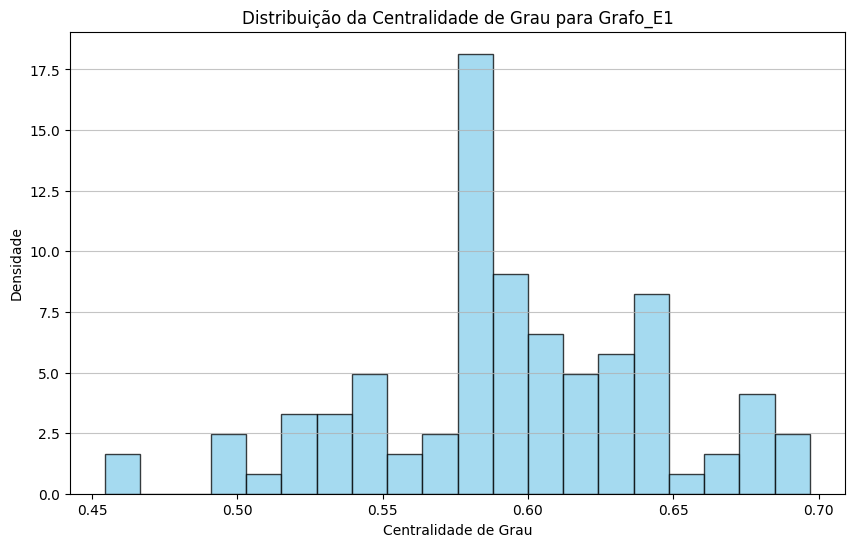


Algumas estatísticas da Centralidade de Grau para Grafo_E1:
  Número de nós: 100
  Mínimo: 0.4545
  Máximo: 0.6970
  Média: 0.5931
  Mediana: 0.5960
  Desvio Padrão: 0.0499


In [774]:
# 1. Calcular a centralidade de grau para Grafo_E1
if 'Grafo_E1' in locals() or 'Grafo_E1' in globals():
    if isinstance(Grafo_E1, nx.Graph):
        degree_centrality_values = list(nx.degree_centrality(Grafo_E1).values())

        # 2. Plotar a distribuição
        plt.figure(figsize=(10, 6))
        plt.hist(degree_centrality_values, bins=20, alpha=0.75, color='skyblue', edgecolor='black', density=True)
        plt.title("Distribuição da Centralidade de Grau para Grafo_E1")
        plt.xlabel("Centralidade de Grau")
        plt.ylabel("Densidade")
        plt.grid(axis='y', alpha=0.75)
        plt.show()

        # Para verificação, vamos imprimir algumas estatísticas resumo dos valores de centralidade
        if degree_centrality_values:
            print(f"\nAlgumas estatísticas da Centralidade de Grau para Grafo_E1:")
            print(f"  Número de nós: {len(degree_centrality_values)}")
            print(f"  Mínimo: {np.min(degree_centrality_values):.4f}")
            print(f"  Máximo: {np.max(degree_centrality_values):.4f}")
            print(f"  Média: {np.mean(degree_centrality_values):.4f}")
            print(f"  Mediana: {np.median(degree_centrality_values):.4f}")
            print(f"  Desvio Padrão: {np.std(degree_centrality_values):.4f}")

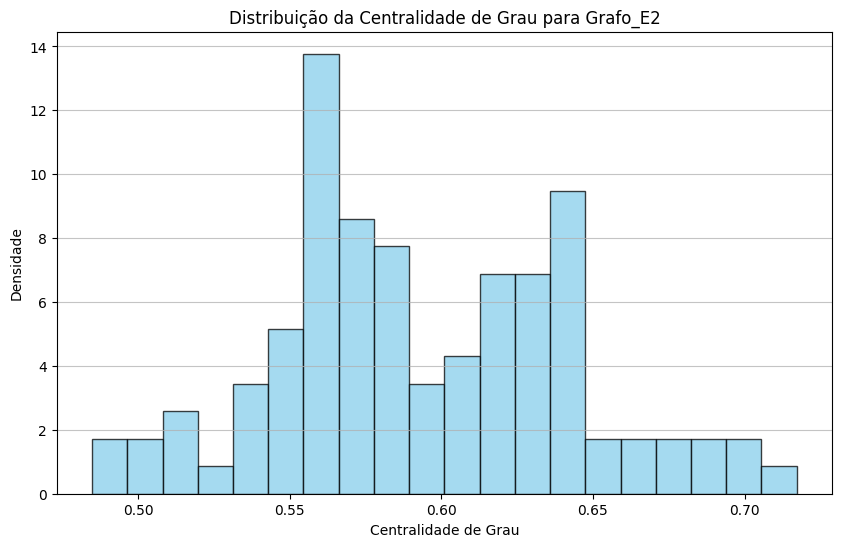


Algumas estatísticas da Centralidade de Grau para Grafo_E2:
  Número de nós: 100
  Mínimo: 0.4848
  Máximo: 0.7172
  Média: 0.5937
  Mediana: 0.5859
  Desvio Padrão: 0.0482


In [775]:
# 1. Calcular a centralidade de grau para Grafo_E2
if 'Grafo_E2' in locals() or 'Grafo_E2' in globals():
    if isinstance(Grafo_E2, nx.Graph):
        degree_centrality_values = list(nx.degree_centrality(Grafo_E2).values())

        # 2. Plotar a distribuição
        plt.figure(figsize=(10, 6))
        plt.hist(degree_centrality_values, bins=20, alpha=0.75, color='skyblue', edgecolor='black', density=True)
        plt.title("Distribuição da Centralidade de Grau para Grafo_E2")
        plt.xlabel("Centralidade de Grau")
        plt.ylabel("Densidade")
        plt.grid(axis='y', alpha=0.75)
        plt.show()

        # Para verificação, vamos imprimir algumas estatísticas resumo dos valores de centralidade
        if degree_centrality_values:
            print(f"\nAlgumas estatísticas da Centralidade de Grau para Grafo_E2:")
            print(f"  Número de nós: {len(degree_centrality_values)}")
            print(f"  Mínimo: {np.min(degree_centrality_values):.4f}")
            print(f"  Máximo: {np.max(degree_centrality_values):.4f}")
            print(f"  Média: {np.mean(degree_centrality_values):.4f}")
            print(f"  Mediana: {np.median(degree_centrality_values):.4f}")
            print(f"  Desvio Padrão: {np.std(degree_centrality_values):.4f}")

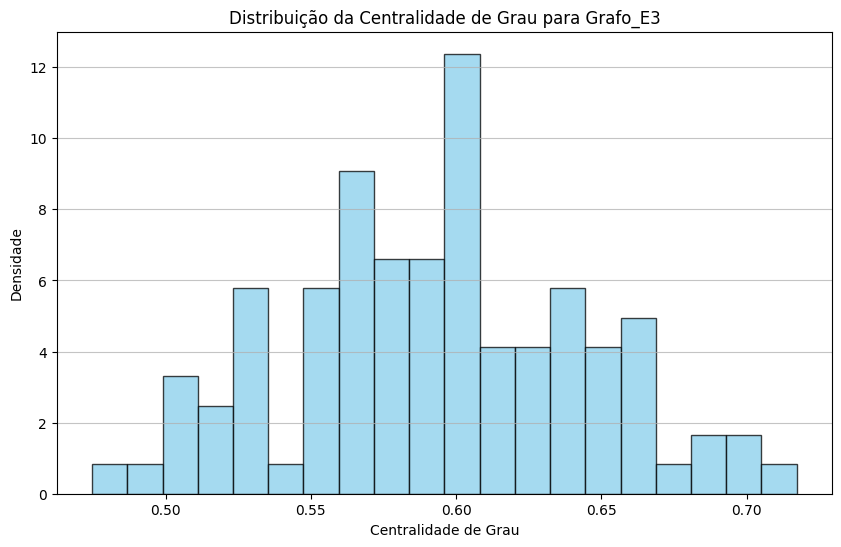


Algumas estatísticas da Centralidade de Grau para Grafo_E3:
  Número de nós: 100
  Mínimo: 0.4747
  Máximo: 0.7172
  Média: 0.5927
  Mediana: 0.5859
  Desvio Padrão: 0.0502


In [776]:
# 1. Calcular a centralidade de grau para Grafo_E3
if 'Grafo_E3' in locals() or 'Grafo_E3' in globals():
    if isinstance(Grafo_W1, nx.Graph):
        degree_centrality_values = list(nx.degree_centrality(Grafo_E3).values())

        # 2. Plotar a distribuição
        plt.figure(figsize=(10, 6))
        plt.hist(degree_centrality_values, bins=20, alpha=0.75, color='skyblue', edgecolor='black', density=True)
        plt.title("Distribuição da Centralidade de Grau para Grafo_E3")
        plt.xlabel("Centralidade de Grau")
        plt.ylabel("Densidade")
        plt.grid(axis='y', alpha=0.75)
        plt.show()


        # Para verificação, vamos imprimir algumas estatísticas resumo dos valores de centralidade
        if degree_centrality_values:
            print(f"\nAlgumas estatísticas da Centralidade de Grau para Grafo_E3:")
            print(f"  Número de nós: {len(degree_centrality_values)}")
            print(f"  Mínimo: {np.min(degree_centrality_values):.4f}")
            print(f"  Máximo: {np.max(degree_centrality_values):.4f}")
            print(f"  Média: {np.mean(degree_centrality_values):.4f}")
            print(f"  Mediana: {np.median(degree_centrality_values):.4f}")
            print(f"  Desvio Padrão: {np.std(degree_centrality_values):.4f}")

####Distribuição de grau

<Figure size 1000x600 with 0 Axes>

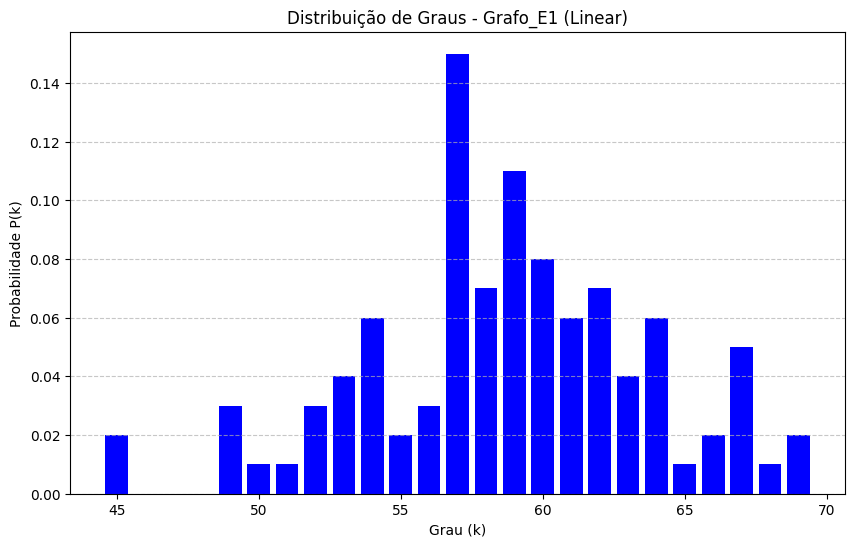

In [777]:
plot_degree_distribution(Grafo_E1, "Grafo_E1")

<Figure size 1000x600 with 0 Axes>

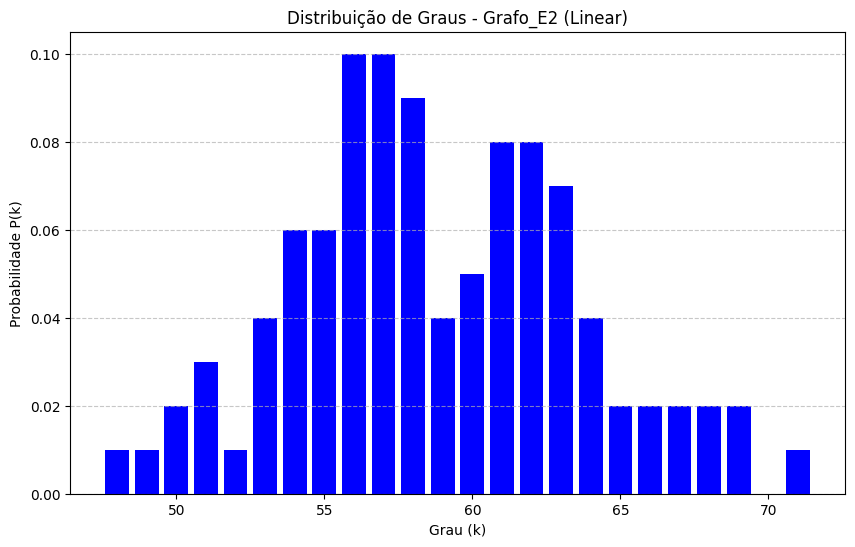

In [778]:
plot_degree_distribution(Grafo_E2, "Grafo_E2")

<Figure size 1000x600 with 0 Axes>

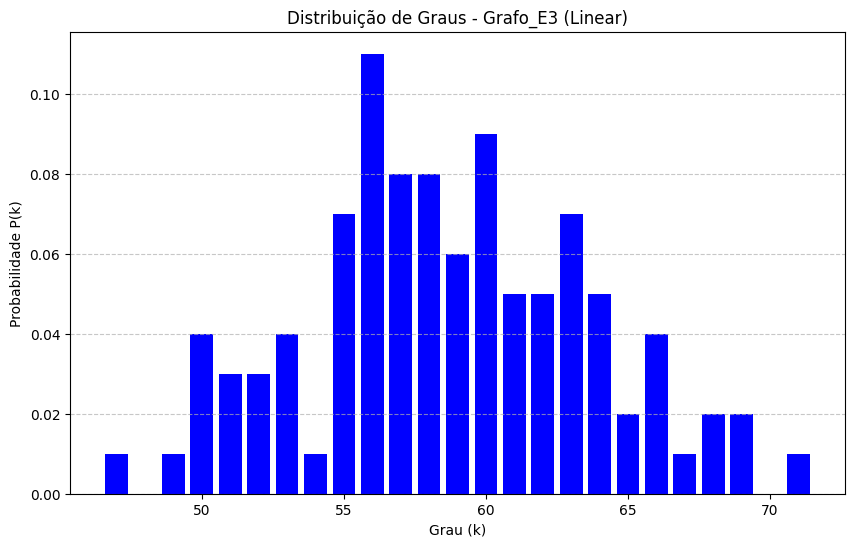

In [779]:
plot_degree_distribution(Grafo_E3, "Grafo_E3")

###Questões:

####1.

In [780]:
#1. Redes livres de escala (como Barabási-Albert, BA) tendem a ser mais dissortativas (hubs se conectam a nós de baixo grau) do que assortativas (hubs se conectam a hubs)?

#Hipótese: Acreditamos que tendem a ser dissortativas ou neutras. O mecanismo de anexação preferencial pode levar hubs a se conectarem a muitos nós novos (e, portanto, de baixo grau inicialmente),
#o que favoreceria a dissortatividade. Redes sociais frequentemente mostram assortatividade, mas redes tecnológicas ou biológicas (que BA tenta modelar) podem ser dissortativas.

#Evidências: Grafos BA, o coeficiente de assortatividade de grau para cada um, tendem a ser dissortativas, porém, quanto maior o número do nodes, mais esse coeficiente tende a zero. Nas redes aleatórias esse valor tende a zero.

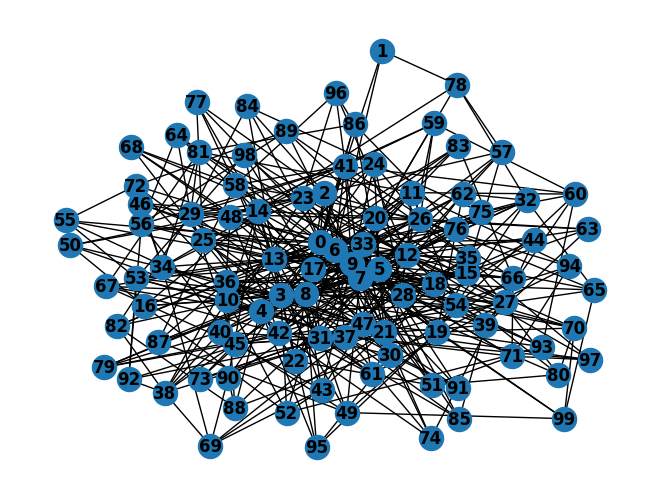

Coeficiente de Assortatividade: -0.12941643714876727


In [798]:
Grafo_EX = nx.barabasi_albert_graph(100, 5, seed = 24003315)

nx.draw(Grafo_EX, with_labels = True, font_weight = 'bold')
plt.show()

assortativity = nx.degree_assortativity_coefficient(Grafo_EX)
print(f"Coeficiente de Assortatividade: {assortativity}")

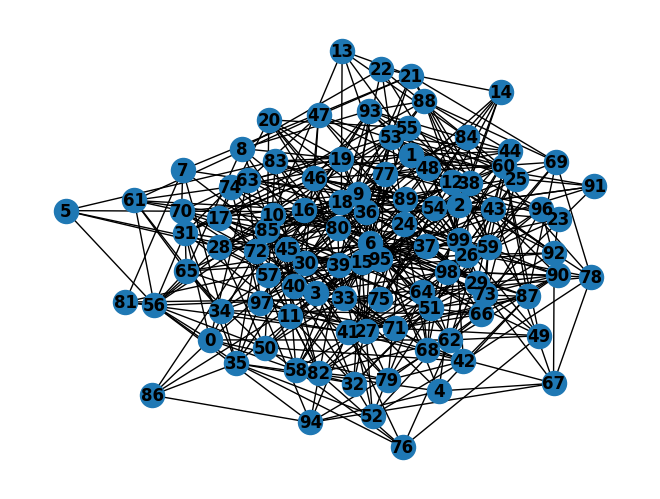

Coeficiente de Assortatividade: -0.04001860321652644


In [803]:
Grafo_aleatório = nx.erdos_renyi_graph(100, 0.1, seed = 24003315, directed = False)

nx.draw(Grafo_aleatório, with_labels = True, font_weight = 'bold')
plt.show()

assortativity = nx.degree_assortativity_coefficient(Grafo_aleatório)
print(f"Coeficiente de Assortatividade: {assortativity}")

####2.

In [781]:
#2. Em redes Barabási-Albert (BA), o aumento do número de arestas adicionadas por novo nó (m) leva a um aumento proporcional no coeficiente de agrupamento medio?

#Hipótese: Acreditamos que sim, até certo ponto. Um valor maior de *m* significa que novos nós se conectam a mais vizinhos existentes, aumentando a probabilidade de formar triângulos.
#No entanto, essa relação pode não ser perfeitamente linear, pois a anexação preferencial ainda domina a topologia.

#Evidências: Gerar grafos BA com N fixo e variando o parâmetro m. Calcular o coeficiente de agrupamento medio para cada grafo e plotar contra m. Analisar a linearidade da relação.

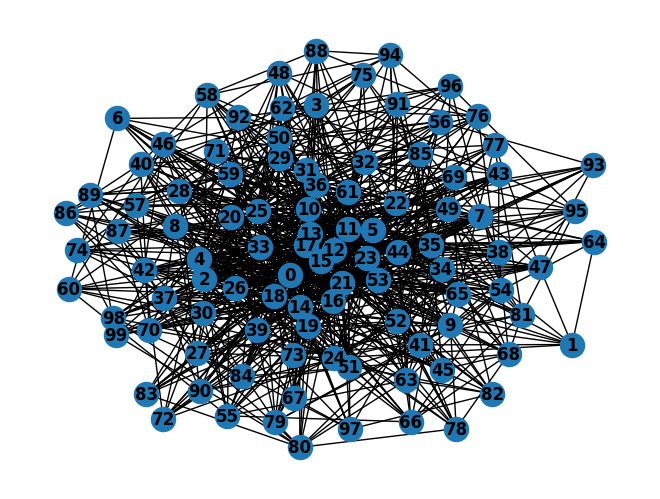

Coeficiente de Agrupamento Médio: 0.3146413247733697


In [808]:
Grafo_EX = nx.barabasi_albert_graph(100, 10, seed = 24003315)

nx.draw(Grafo_EX, with_labels = True, font_weight = 'bold')
plt.show()

average_clustering_ex = nx.average_clustering(Grafo_EX)
print(f"Coeficiente de Agrupamento Médio: {average_clustering_ex}")

####3.

In [782]:
#3. Em redes Watts-Strogatz (WS), como a probabilidade de religação (p) afeta o comprimento do caminho médio e o coeficiente de agrupamento medio simultaneamente?

#Hipótese: Acreditamos que um pequeno valor de p aumenta drasticamente o comprimento do caminho médio, mantendo ainda um alto coeficiente de agrupamento.
#Conforme p aumenta, o comprimento do caminho médio diminui e o coeficiente de agrupamento também cai significativamente.

#Evidências: Grafos WS variando p de 0 a 1.

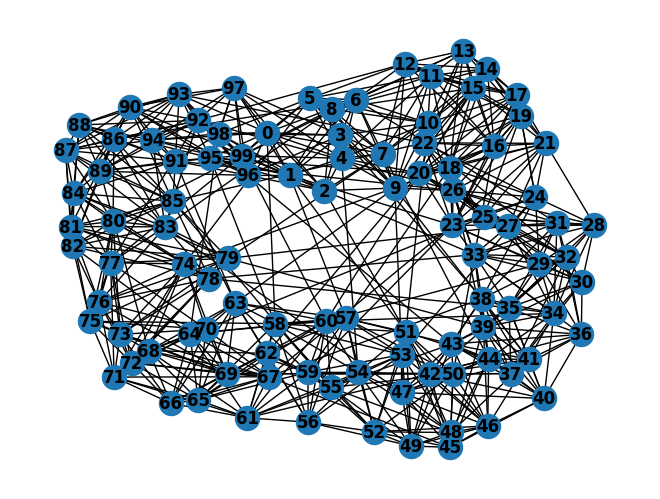

Caminho Médio: 2.308686868686869
Coeficiente de Agrupamento Médio: 0.5175254892166659


In [814]:
Grafo_EX = nx.watts_strogatz_graph(100, 15, 0.1, seed = 24003315)

nx.draw(Grafo_EX, with_labels = True, font_weight = 'bold')
plt.show()

avg_path_length = nx.average_shortest_path_length(Grafo_EX)
print("Caminho Médio:", avg_path_length)

average_clustering = nx.average_clustering(Grafo_EX)
print(f"Coeficiente de Agrupamento Médio: {average_clustering}")

####4.

In [783]:
#4. Há correlação entre a probabilidade de conexão (p) e o coeficiente de agrupamento médio em redes Erdős-Rényi (ER)?

#Hipótese: Acreditamos que sim, mas de forma não linear. Para valores muito baixos de p, o grafo é esparso com baixo agrupamento. À medida que p aumenta, o agrupamento tende a aumentar até um certo ponto,
#pois mais triângulos são formados. No entanto, para p muito alto (próximo de 1), o grafo se torna quase completo, e o coeficiente de agrupamento médio se aproxima de 1. A correlação pode ser positiva até um limiar de p.

#Evidências: Grafos ER com diferentes valores de p, calcular o coeficiente de agrupamento médio para cada um.

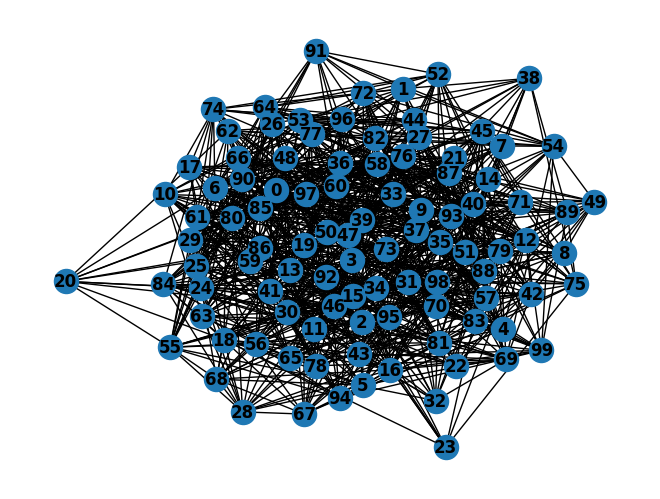

Coeficiente de Agrupamento Médio: 0.19068203172120607


In [818]:
Grafo_EX = nx.erdos_renyi_graph(100, 0.2, seed = 24003315, directed = False)
nx.draw(Grafo_EX, with_labels = True, font_weight = 'bold')
plt.show()

average_clustering = nx.average_clustering(Grafo_EX)
print(f"Coeficiente de Agrupamento Médio: {average_clustering}")

####5.

In [784]:
#5. Se compararmos redes ER, BA e WS com aproximadamente o mesmo número de nós e o mesmo grau médio, qual delas apresentará a maior variância na distribuição de graus?

#Hipótese: Acreditamos que a rede Barabási-Albert (BA) apresentará a maior variância. Redes ER têm distribuição de Poisson (ou binomial), redes WS têm uma distribuição mais estreita em torno do grau médio inicial
#(antes da religação significativa), enquanto redes BA são livres de escala, caracterizadas por uma cauda longa na distribuição de graus (poucos hubs com grau muito alto e muitos nós com grau baixo).

#Evidências: Gerar os três tipos de redes com N e grau médio aproximadamente iguais. Plotar as distribuições de grau e calcular a variância para cada uma. Comparar os valores de variância.

<Figure size 1000x600 with 0 Axes>

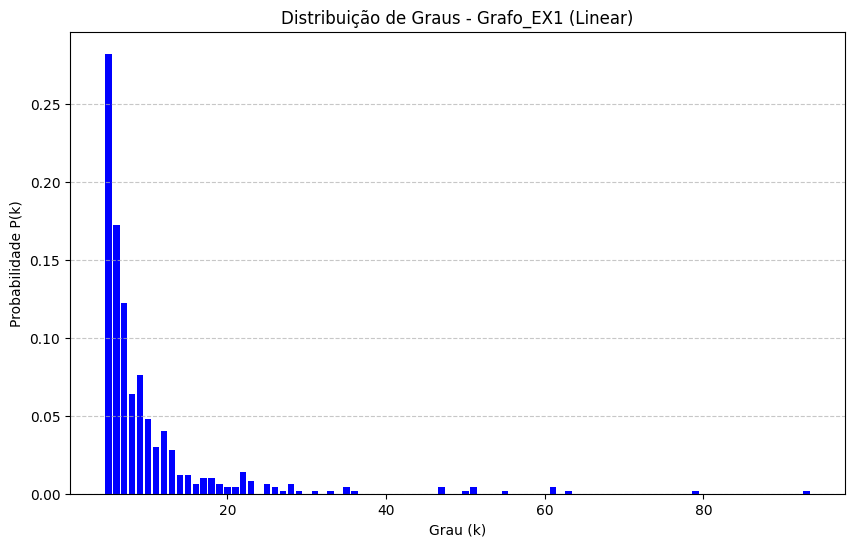

<Figure size 1000x600 with 0 Axes>

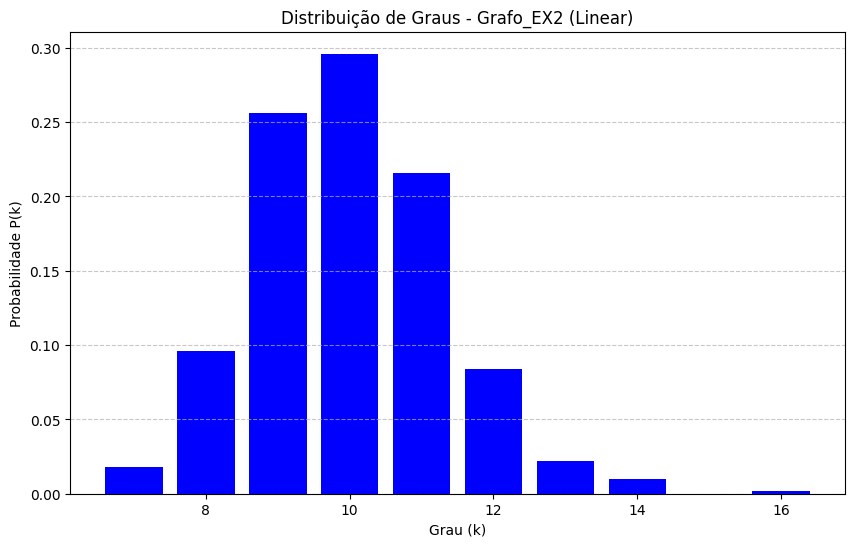

<Figure size 1000x600 with 0 Axes>

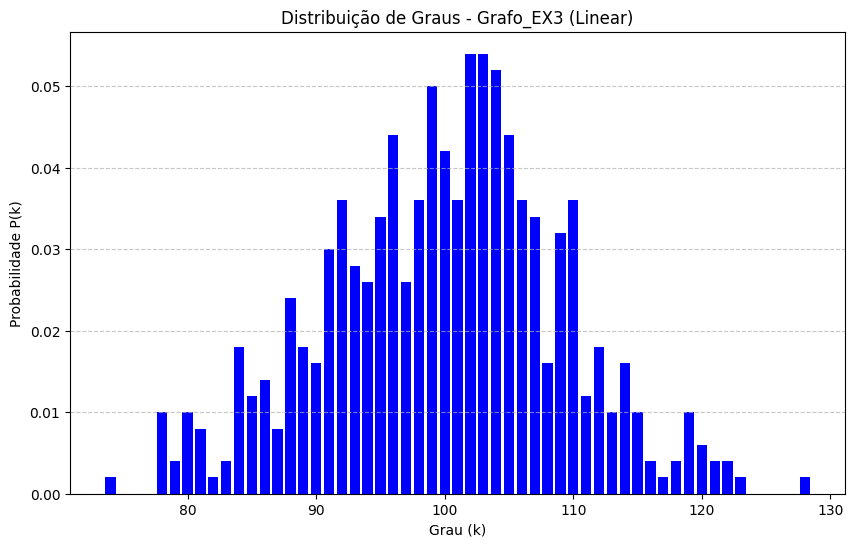

In [821]:
Grafo_EX1 = nx.barabasi_albert_graph(500, 5, seed = 24003315)
Grafo_EX2 = nx.watts_strogatz_graph(500, 10, 0.2, seed = 24003315)
Grafo_EX3 = nx.erdos_renyi_graph(500, 0.2, seed = 24003315, directed = False)

plot_degree_distribution(Grafo_EX1, "Grafo_EX1")
plot_degree_distribution(Grafo_EX2, "Grafo_EX2")
plot_degree_distribution(Grafo_EX3, "Grafo_EX3")